### Import Libraries

In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the display settings

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 500)

### Import and Reading the dataset

In [3]:
df_leads = pd.read_csv(r"C:\Users\Asus\Desktop\Lead Scoring Case study\Lead Scoring Assignment\Leads.csv")
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Checking the shape of the dataset
df_leads.shape

(9240, 37)

In [5]:
# checking the dataset's basic information
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

#### Observations
1. There are 7 Numerical Columns and 30 categorical columns
2. Around 17 columns have NaN values present in them.
3. Numerical columns such as 'TotalVisits', 'Total Time spent on Website', and 'Page Views Per Visit' have outliers present in them

## Exploratory Data Analysis

### Handling the missing values

In [7]:
round(df_leads.isna().sum()/len(df_leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# filtering the columns with more than 40% missing values
missingvalues_40 = df_leads.columns[round(df_leads.isna().sum()/len(df_leads)*100,2) > 40]
missingvalues_40 

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

#### Observations
1. Activity Index and Activity scores have more than 40% values as Null values, these are not important for our model building and hence we can drop these columns
2. Lead Quality has also more than 50% Null values, lets see what data is present in the columns

In [9]:
# checking different values of Lead Quality column
df_leads['Lead Quality'].value_counts(dropna=None, normalize=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

Since there are more than 50% missing values, Lead Quality column will not be useful in model building. Hence we can drop these column with missing values more than 40%

In [10]:
# dropping the columns with more than 40% missing values

df_leads = df_leads.drop(columns=missingvalues_40, axis = 1)

In [11]:
missing_df = df_leads.isna().sum()/len(df_leads)*100
missing_df.sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [12]:
# check the values present in each of the columns

In [13]:
for col in df_leads.columns:
    print('-----------------------------------------')
    print(df_leads[col].value_counts(dropna=False))
    print('-----------------------------------------')

-----------------------------------------
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
-----------------------------------------
-----------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
-----------------------------------------
-----------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Imp

#### Observations
1. Below columns have Select as one of the category levels, we should replace these Select values to NaN values.</br>
    a. 'Specialization' - 1942 entries</br>
    b. 'How did you hear about X Education' - 5043 entries</br>
    c. 'Lead Profile' - 4146 entries</br>
    d. 'City' - 2249 entries</br>
</br>

In [14]:
# Replacing all the Select values with NaN values

df_leads['Specialization'] = df_leads['Specialization'].replace('Select', np.nan)
df_leads['How did you hear about X Education'] = df_leads['How did you hear about X Education'].replace('Select', np.nan)
df_leads['Lead Profile'] = df_leads['Lead Profile'].replace('Select', np.nan)
df_leads['City'] = df_leads['City'].replace('Select', np.nan)

In [15]:
# checking the null values again 

missing_df = df_leads.isna().sum()/len(df_leads)*100
missing_df.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [16]:
# filtering the columns with more than 39% missing values

missingvalues_39 = df_leads.columns[round(df_leads.isna().sum()/len(df_leads)*100,2) > 39]
missingvalues_39 

Index(['How did you hear about X Education', 'Lead Profile', 'City'], dtype='object')

In [17]:
# dropping the columns with more than 40% missing values

df_leads = df_leads.drop(columns=missingvalues_39, axis = 1)

In [18]:
# checking the null values again 

missing_df = df_leads.isna().sum()/len(df_leads)*100
missing_df.sort_values(ascending=False)

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
X Education Forums                                0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.0000

### Eliminating Redundant columns


1. Below columns have only one values as category, hence they do not have any variance in the data. So we cannot use them model building for predicting target variable.</br>
    a. 'Magazine'</br>
    b. 'Receive More Updates About Our Courses'</br>
    c. 'Update me on Supply Chain Content'</br>
    d. 'Get updates on DM Content'</br>
    e. 'I agree to pay the amount through cheque'</br>
</br>
2. Below columns also have very little variance, so these columns will not useful in model building</br>
    a. Search</br>
    b. Newspaper Article</br>
    c. X Education Forums</br>
    d. Newspaper</br>
    e. Digital Advertisement</br>
    f. Through Recommendations</br>
</br>

In [19]:
# creating a list of all the non-variance columns, so that we can delete them in one go

NoVariancecolumns = ['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque','Search', 'Newspaper Article',
                     'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations']

In [20]:
# dropping the no-variance columns

df_leads = df_leads.drop(columns=NoVariancecolumns, axis =1)

In [21]:
# checking different values for column Prospect ID, Lead Number

print(df_leads['Prospect ID'].duplicated)
print('-----------------------------------------------')
print(df_leads['Lead Number'].duplicated)


<bound method Series.duplicated of 0       7927b2df-8bba-4d29-b9a2-b6e0beafe620
1       2a272436-5132-4136-86fa-dcc88c88f482
2       8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3       0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4       3256f628-e534-4826-9d63-4a8b88782852
                        ...                 
9235    19d6451e-fcd6-407c-b83b-48e1af805ea9
9236    82a7005b-7196-4d56-95ce-a79f937a158d
9237    aac550fe-a586-452d-8d3c-f1b62c94e02c
9238    5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9
9239    571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Name: Prospect ID, Length: 9240, dtype: object>
-----------------------------------------------
<bound method Series.duplicated of 0       660737
1       660728
2       660727
3       660719
4       660681
         ...  
9235    579564
9236    579546
9237    579545
9238    579538
9239    579533
Name: Lead Number, Length: 9240, dtype: int64>


Since there is no duplicate present in both the columns, it means these are unique identifers for the customers. hence can be deleted as they do not provide any predictive power in the model building

In [22]:
# dropping the redundant columns

df_leads = df_leads.drop(columns=['Prospect ID','Lead Number'], axis =1 )

### Checking the datatypes

In [23]:
# checking the datatypes with the data present in the DataFrames
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [24]:
df_leads.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags A free copy of Mastering The Interview  \
0          Interested in other courses                                     No   
1                              Ringing                                     No   
2  Will revert after reading the email                                    Yes   
3                              Ringing                                     No   
4  Will revert after reading the email                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

There are no discrepancies in the datatype of the columns.

### Checking the typos and imputing missing values for Categorical variables

In [25]:
# checking for typos in Lead Origin column
df_leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [26]:
# checking for typos in Lead Source column
df_leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Observations

1. 'Google' and 'google' are same values, we have to make them 
2. 'WeLearn' and 'welearnblog_Home' are same values, we have to make them consistent
3. 'youtubechannel' should be renamed to 'Youtube'
4. 'bing' should be renamed to 'Bing'
5. 'testone' should be renamed to 'Testone'
6. 'Press_Release' should be renamed to 'Press Release'
7. 'blog' should be renamed to 'Blog'
8. We can put all the categories less than 100 in one category 'Others' for data interpretation

In [27]:
# Replacing or renaming the same values to make the data consistent
df_leads['Lead Source'].replace('google', 'Google', inplace= True)
df_leads['Lead Source'].replace('welearnblog_Home', 'WeLearn', inplace= True)
df_leads['Lead Source'].replace('youtubechannel', 'YouTube', inplace= True)
df_leads['Lead Source'].replace('bing', 'Bing', inplace= True)
df_leads['Lead Source'].replace('testone', 'Testone', inplace= True)
df_leads['Lead Source'].replace('Press_Release', 'Press Release', inplace= True)
df_leads['Lead Source'].replace('blog', 'Blog', inplace= True)
df_leads['Lead Source'].replace(['Facebook','Bing','Click2call','Press Release','Live Chat','Social Media',
                                'YouTube','Testone','Pay per Click Ads','WeLearn','Blog','NC_EDM'], 'Others', inplace = True)

In [28]:
# after updating the categories for lead Source column
df_leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

Since there are 36 Null values, we can impute the value with 'Google' since it is the mode of this variable

In [29]:
# filling the missing values in the column with the mode of the column variable

df_leads['Lead Source'].fillna('Google', inplace=True)

In [30]:
# checking the typos and values in the 'Do not Email' column
df_leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [31]:
# checking the typos and values in the 'Do not Call' column
df_leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

Since there is lot of data imbalance in the column, we can drop this column as this no variance and will not impact the final prediction in model building

In [32]:
# dropping the 'Do Not Call' due to data imbalance
df_leads.drop(columns=['Do Not Call'], axis = 1, inplace=True)

In [33]:
# checking the typos and values in the 'Do not Call' column
df_leads['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [34]:
# checking the typos and values in the 'Last Activity' column
df_leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Observation:
1. We can impute the missing value with the 'Email Opened' since it is the mode of the categorical variable
2. Also we can group together low frequency columns into a new category 'Others'

In [35]:
# imputing the null values with the mode of the column - 'Email Opened'
df_leads['Last Activity'].fillna('Email Opened', inplace=True)

In [36]:
# grouping low frequency values into new category 'Others'
df_leads['Last Activity'].replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                  'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                  'Resubscribed to emails'], 'Others', inplace=True)

In [37]:
# checking the typos and values in the 'Country' column
df_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### Observations
1. Impute the missing values with the mode of the column, which is 'India'
2. Replace 'unknown' as NaN and replace it with mode of the column


In [38]:
# imputing the missing values for 'Country' columns with the mode of the column
df_leads['Country'].fillna('India', inplace= True)
df_leads['Country'].replace('unknown','India', inplace= True)

In [39]:
# checking the data imbalance in the column Country
df_leads['Country'].value_counts(dropna=False, normalize=True)*100

India                   96.948052
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Italy                    0.021645
Uganda                   0.021645
Netherlands              0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Russia                   0.010823
Kenya                    0.010823
Sri Lanka     

Since there is lot of data imbalance in the column, it will not be helpful in model building and predicting any useful outcome. hence we can drop the column

In [40]:
# dropping the Country column from the dataset
df_leads.drop(columns=['Country'], axis =1, inplace=True)

In [41]:
# checking the typos and values in the 'Specialization' column
df_leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Observation
1. We can replace the missing values with a new category 'Others'

In [42]:
# impute the missing values for 'Specialization' column with the new category 'Others'
df_leads['Specialization'].fillna('Others', inplace =True)

In [43]:
# checking the typos and values in the 'What is your current occupation' column
df_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Observation:
1. We can impute the missing values with Category as 'Other

In [44]:
# imputing the missing values with 'Other'
df_leads['What is your current occupation'].fillna('Other', inplace=True)

In [45]:
# checking the typos and values in the 'What matters most to you in choosing a course' column
df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Observation:
1. We can impute the missing values with Category as 'Other

In [46]:
# imputing the missing values with 'Other'
df_leads['What matters most to you in choosing a course'].fillna('Other', inplace=True)

In [47]:
# checking the typos and values in the 'Tags' column
df_leads['Tags'].value_counts(dropna=False, normalize=True)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

#### Observation:
1. Since we have more than 35% of values as missing, and imputing missing values with any of the value can deviate the correct result

In [48]:
# dropping the column Tags, as we have more than 35% of missing values
df_leads.drop(columns=['Tags'], axis = 1, inplace=True)

In [49]:
# checking the typos and values in the 'What matters most to you in choosing a course' column
df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64

In [50]:
# checking the typos and values in the 'A free copy of Mastering The Interview ' column
df_leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [51]:
# checking the typos and values in the 'Last Notable Activity' column
df_leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

#### Observation:
1. Since this column is redundant to 'Last Activity' Column, will increase the multicollinearity. hence we can drop the column

In [52]:
# dropping the redundant column
df_leads.drop(columns = ['Last Notable Activity'], axis =1, inplace=True)

### Checking the typos and imputing missing values for Numerical variables

In [53]:
# checking the typos and values in the 'TotalVisits' column
df_leads['TotalVisits'].value_counts(dropna=False, normalize=True)

0.0      0.236905
2.0      0.181818
3.0      0.141342
4.0      0.121212
5.0      0.084740
6.0      0.050433
1.0      0.042749
7.0      0.033442
8.0      0.024242
9.0      0.017749
NaN      0.014827
10.0     0.012338
11.0     0.009307
13.0     0.005195
12.0     0.004870
14.0     0.003896
16.0     0.002273
15.0     0.001948
17.0     0.001732
18.0     0.001623
20.0     0.001299
19.0     0.000974
21.0     0.000649
23.0     0.000649
24.0     0.000541
25.0     0.000541
27.0     0.000541
22.0     0.000325
29.0     0.000216
28.0     0.000216
26.0     0.000216
141.0    0.000108
55.0     0.000108
30.0     0.000108
43.0     0.000108
74.0     0.000108
41.0     0.000108
54.0     0.000108
115.0    0.000108
251.0    0.000108
32.0     0.000108
42.0     0.000108
Name: TotalVisits, dtype: float64

In [54]:
# finding the mean, median for the 'TotalVisit' Column
df_leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Observations:
1. We can impute the numerical missing values with the median of the TotalVisit variable

In [55]:
# imputing the missing values with median of the column
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].median(), inplace=True)

In [56]:
# checking the typos and values in the 'Page Views Per Visit' column
df_leads['Page Views Per Visit'].value_counts(dropna=False, normalize=True)

0.00     0.236905
2.00     0.194264
3.00     0.129437
4.00     0.096970
1.00     0.070455
5.00     0.055952
1.50     0.033117
6.00     0.026407
2.50     0.026082
NaN      0.014827
7.00     0.014394
3.50     0.010173
8.00     0.009307
1.33     0.007143
1.67     0.006494
2.33     0.006385
2.67     0.005844
9.00     0.004870
4.50     0.004654
1.75     0.003030
3.33     0.002922
10.00    0.002706
1.25     0.002489
5.50     0.002273
2.25     0.002056
11.00    0.001948
3.67     0.001732
6.50     0.001407
1.80     0.001407
2.75     0.001299
1.40     0.001190
4.33     0.000974
14.00    0.000974
2.80     0.000974
2.20     0.000974
1.60     0.000866
2.17     0.000866
3.25     0.000866
2.40     0.000649
13.00    0.000649
1.20     0.000541
12.00    0.000541
1.43     0.000433
3.40     0.000433
2.60     0.000433
1.71     0.000433
1.83     0.000433
15.00    0.000433
1.38     0.000325
4.25     0.000325
4.75     0.000325
1.57     0.000325
16.00    0.000325
5.67     0.000325
1.78     0.000325
1.56     0

In [57]:
df_leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Observations:
1. We can impute the numerical missing values with the median of the 'Page Views Per Visit' variable

In [58]:
# imputing the missing values with median of the column
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].median(), inplace=True)

### Handling the outliers

### A. Numerical variables

##### Total Visits Variable

Text(0.5, 0, ' Total Visits \n')

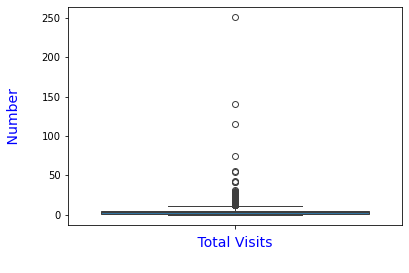

In [59]:
sns.boxplot(data=df_leads, y='TotalVisits')
plt.ylabel(" Number \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})
plt.xlabel(" Total Visits \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})

#### Observations

1. There are few outliers present in the data which can skew our predictions

In [60]:
# check the 99.5% quantile range for the 'TotalVisit' Variable
quantile_99 = df_leads['TotalVisits'].quantile(0.995)
df_leads = df_leads[(df_leads['TotalVisits'] <= quantile_99)]

Text(0.5, 0, ' Total Visits \n')

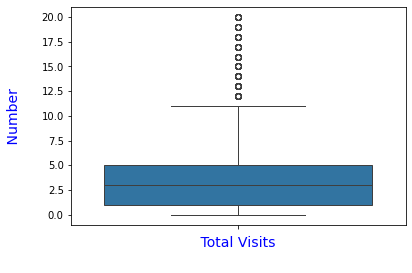

In [61]:
# visualising the 'TotalVisits' variable after removing the outliers
sns.boxplot(data=df_leads, y='TotalVisits')
plt.ylabel(" Number \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})
plt.xlabel(" Total Visits \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})

##### Total Time Spent on Website 

Text(0.5, 0, ' Total Time Spent on Website  \n')

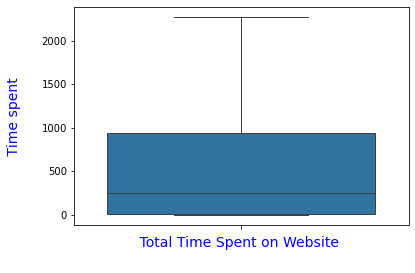

In [62]:
sns.boxplot(data=df_leads, y='Total Time Spent on Website')
plt.ylabel(" Time spent \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})
plt.xlabel(" Total Time Spent on Website  \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})

#### Observations

1. There is no outliers present in the data, hence no treatment is required for this column.

##### Page Views Per Visit

Text(0.5, 0, ' Page Views Per Visit \n')

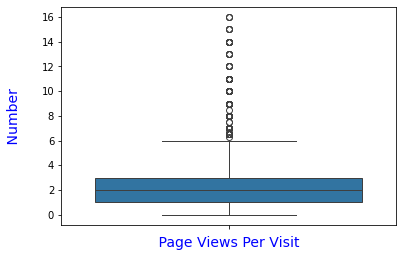

In [63]:
sns.boxplot(data=df_leads, y='Page Views Per Visit')
plt.ylabel(" Number \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})
plt.xlabel(" Page Views Per Visit \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})

#### Observations

1. There are few outliers present in the data which can skew our predictions. 
2. Upper cap is between 6 and 7, there are few values more than 10, we need to remove the outliers

In [64]:
# check the 99% quantile range for the 'TotalVisit' Variable
quantile_99 = df_leads['Page Views Per Visit'].quantile(0.99)
df_leads = df_leads[(df_leads['Page Views Per Visit'] <= quantile_99)]

Text(0.5, 0, ' Page Views Per Visit \n')

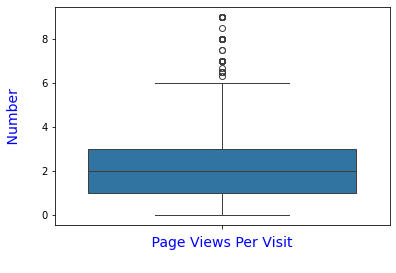

In [65]:
# visualising the 'TotalVisits' variable after removing the outliers
sns.boxplot(data=df_leads, y='Page Views Per Visit')
plt.ylabel(" Number \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})
plt.xlabel(" Page Views Per Visit \n", fontdict= {'fontsize':14, 'fontweight': 10, 'color': 'Blue'})

### Target Variable and Data Imbalance

Our target variable is 'Converted' column. 1 shows the lead is converted and 0 represent lead not converted

In [66]:
# checking the number of lead which are converted
ConversionRate = round(df_leads['Converted'].value_counts(dropna=False, normalize=True)*100, 2)
ConversionRate

0    61.53
1    38.47
Name: Converted, dtype: float64

#### Observation:
1. Conversion rate of lead to customer is around 39%

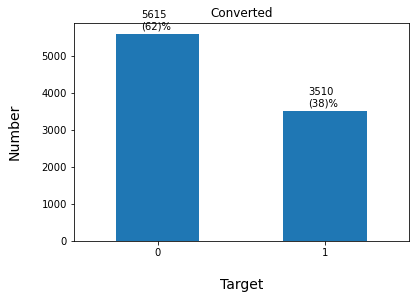

In [67]:
# visualizing the distributon of the target variable
plt.figure(figsize = (6,4))
ax = df_leads['Converted'].value_counts().plot.bar()
for i in ax.patches:
    ax.annotate('{:0.0f}\n({:.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['Converted'])), (i.get_x()+0.15, i.get_height()+120))
fontdict = {'fontsize' : 14, 'fontweight': 10, 'color' : 'Black'}
plt.title("Data Imbalance", fontdict=fontdict)
plt.xlabel("\nTarget", fontdict=fontdict)
plt.ylabel("Number\n", fontdict=fontdict)
plt.xticks(rotation=0)
plt.title("Converted")
plt.show()

### Univariate Analysis

##### Lead Origin

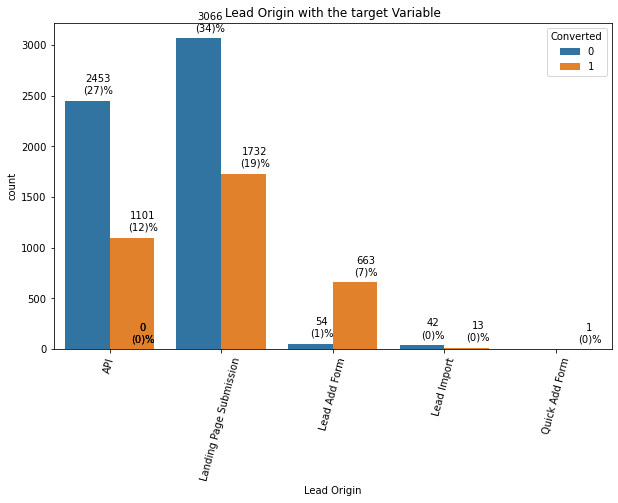

In [68]:
# Analysing the 'Lead Origin' with the target Variable
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_leads, x='Lead Origin', hue='Converted')
for i in ax.patches:
        ax.annotate('{:0.0f}\n({:0.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['Lead Origin'])), (i.get_x()+0.30, i.get_height()+50), ha = 'center', va = 'bottom')
plt.title('Lead Origin with the target Variable')
plt.xticks(rotation = 75)
plt.show()

In [69]:
# conversion rate for Landing Page Submission
conversion_rate_of_LPS = len(df_leads[(df_leads['Lead Origin'] == 'Landing Page Submission')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['Lead Origin'] == 'Landing Page Submission')])
conversion_rate_of_API = len(df_leads[(df_leads['Lead Origin'] == 'API')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['Lead Origin'] == 'API')])
print('Conversion Rate of Landing Page Submission', round(conversion_rate_of_LPS*100))
print('Conversion Rate of API', round(conversion_rate_of_API*100))

Conversion Rate of Landing Page Submission 36
Conversion Rate of API 31


#### Observations:
1. Landing Page Submission and API have high number of Leads as compared to other Origins
2. Conversion of Lead is also higher for landing Page submission (\~36%) than API (\~31%)
3. In order to improve the overall conversion rate, X education should focus on increasing the conversion of API and Landing Page submission.
4. They should also increase Leads form Lead Ads Form as they have the highest conversion among all

##### Lead Source

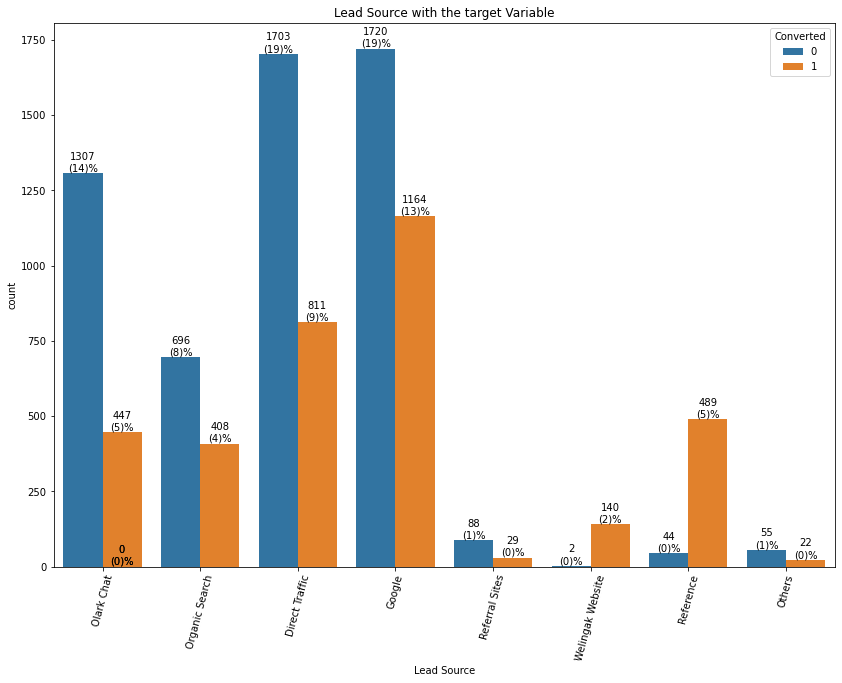

In [70]:
# Analysing the 'Lead Source' with the target Variable
plt.figure(figsize=(14,10))
ax=sns.countplot(data=df_leads, x='Lead Source', hue='Converted')
for i in ax.patches:
        ax.annotate('{:0.0f}\n({:0.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['Lead Source'])), (i.get_x()+0.20, i.get_height()+0.50), ha = 'center', va = 'bottom')
plt.title('Lead Source with the target Variable')
plt.xticks(rotation = 75)
plt.show()

In [71]:
# conversion rate for Lead Sources
conversion_rate_of_Google = len(df_leads[(df_leads['Lead Source'] == 'Google')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['Lead Source'] == 'Google')])
conversion_rate_of_DT = len(df_leads[(df_leads['Lead Source'] == 'Direct Traffic')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['Lead Source'] == 'Direct Traffic')])
conversion_rate_of_OChat = len(df_leads[(df_leads['Lead Source'] == 'Olark Chat')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['Lead Source'] == 'Olark Chat')])
conversion_rate_of_References = len(df_leads[(df_leads['Lead Source'] == 'Reference')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['Lead Source'] == 'Reference')])
conversion_rate_of_OrgSearch = len(df_leads[(df_leads['Lead Source'] == 'Organic Search')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['Lead Source'] == 'Organic Search')])
print('Conversion Rate of Google', round(conversion_rate_of_Google*100))
print('Conversion Rate of Direct Traffice', round(conversion_rate_of_DT*100))
print('Conversion Rate of Olark Chat', round(conversion_rate_of_OChat*100))
print('Conversion Rate of Reference', round(conversion_rate_of_References*100))
print('Conversion Rate of Organic Search', round(conversion_rate_of_OrgSearch*100))

Conversion Rate of Google 40
Conversion Rate of Direct Traffice 32
Conversion Rate of Olark Chat 25
Conversion Rate of Reference 92
Conversion Rate of Organic Search 37


#### Observations:
1. Google and Direct Traffice are generating high number of leads followed by Olark Chat
2. The conversion rate is highest for Reference approx 92%, than for google (\~40%) and Organic Search (\~37)  
3. In order to improve the overall conversion rate, X education should focus on increasing the Lead conversion through Google, Organic Search, Direct Traffic.
4. They should increase more Leads from References and Welingak WebSites


##### Do Not Email

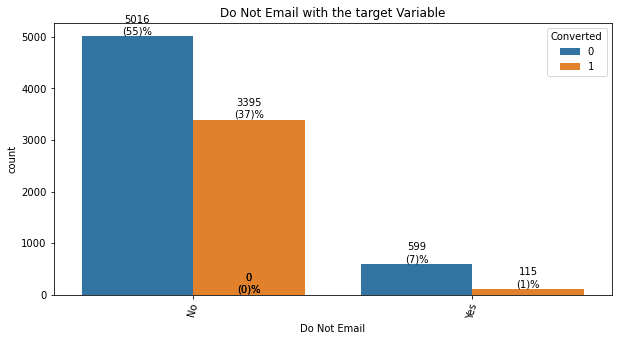

In [72]:
# Analysing the 'Do Not Email' with the target Variable
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_leads, x='Do Not Email', hue='Converted')
for i in ax.patches:
        ax.annotate('{:0.0f}\n({:0.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['Do Not Email'])), (i.get_x()+0.20, i.get_height()+0.50), ha = 'center', va = 'bottom')
plt.title('Do Not Email with the target Variable')
plt.xticks(rotation = 75)
plt.show()

In [73]:
# conversion rate for leads who opted for 'Do Not Email' as 'No'
conversion_rate_of_Emailed = len(df_leads[(df_leads['Do Not Email'] == 'No')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['Do Not Email'] == 'No')])
print('Conversion Rate of Leads who opted for Email sharing', round(conversion_rate_of_Emailed*100))

Conversion Rate of Leads who opted for Email sharing 40


##### Observation
1. Majority of Leads have asked to share the course details over email
2. Out of these, around 40% of the Leads got coverted
3. Steps to be taken to share more informative content over email so that conversion rate will increase

In [74]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9125 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9125 non-null   object 
 1   Lead Source                                    9125 non-null   object 
 2   Do Not Email                                   9125 non-null   object 
 3   Converted                                      9125 non-null   int64  
 4   TotalVisits                                    9125 non-null   float64
 5   Total Time Spent on Website                    9125 non-null   int64  
 6   Page Views Per Visit                           9125 non-null   float64
 7   Last Activity                                  9125 non-null   object 
 8   Specialization                                 9125 non-null   object 
 9   What is your current occupation                9125 

##### Last Activity

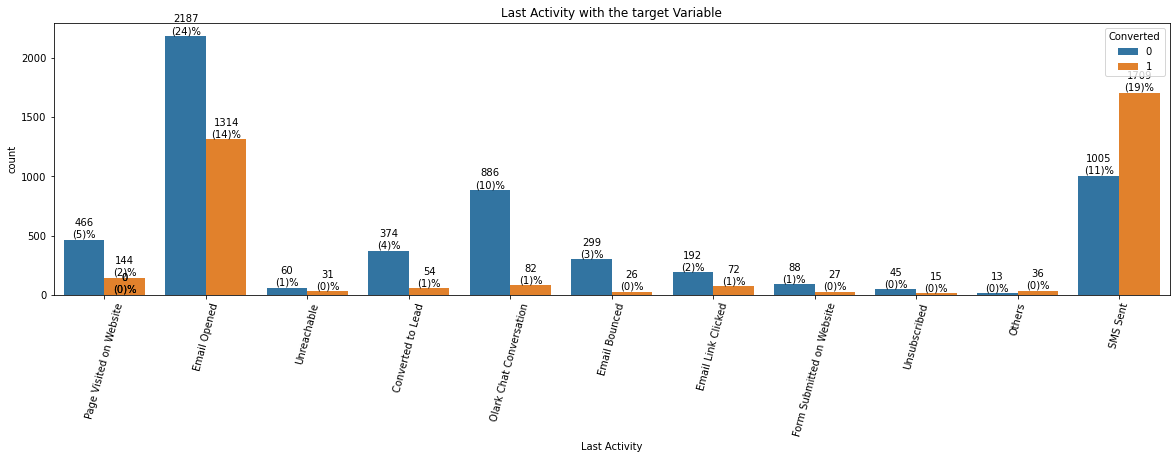

In [75]:
# Analysing the 'Last Activity' with the target Variable
plt.figure(figsize=(20,5))
ax=sns.countplot(data=df_leads, x='Last Activity', hue='Converted')
for i in ax.patches:
        ax.annotate('{:0.0f}\n({:0.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['Last Activity'])), (i.get_x()+0.20, i.get_height()+0.50), ha = 'center', va = 'bottom')
plt.title('Last Activity with the target Variable')
plt.xticks(rotation = 75)
plt.show()

##### Observation
1. Email and SMS are the mail source which Leads uses on daily basis, and these should be targeted to converts the leads

##### Specialization

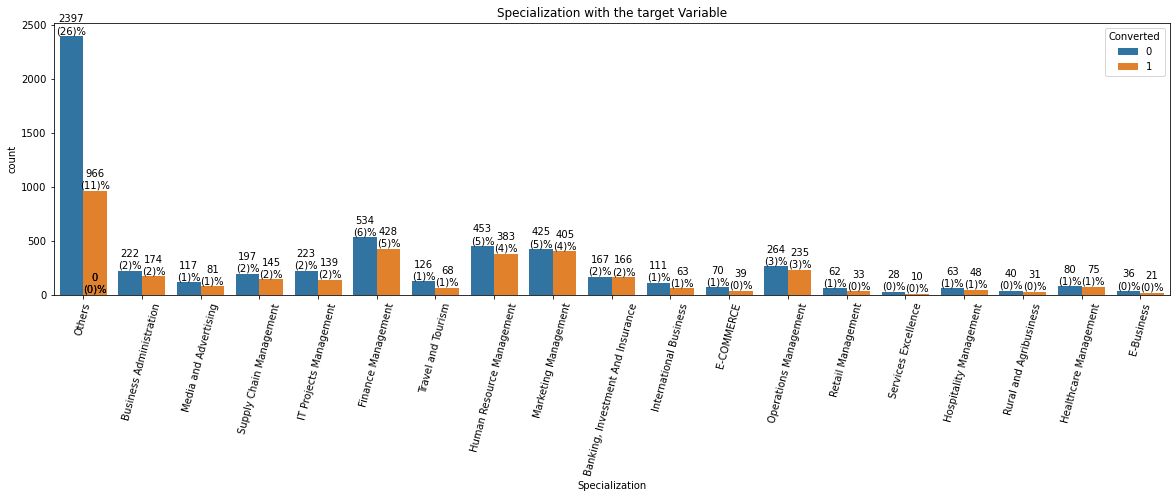

In [76]:
# Analysing the 'Specialization' with the target Variable
plt.figure(figsize=(20,5))
ax=sns.countplot(data=df_leads, x='Specialization', hue='Converted')
for i in ax.patches:
        ax.annotate('{:0.0f}\n({:0.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['Specialization'])), (i.get_x()+0.20, i.get_height()+0.50), ha = 'center', va = 'bottom')
plt.title('Specialization with the target Variable')
plt.xticks(rotation = 75)
plt.show()

##### Observation
1. Leads from Finance, HR, Marketing, Operating Management are the most converted leads

##### What is your current occupation

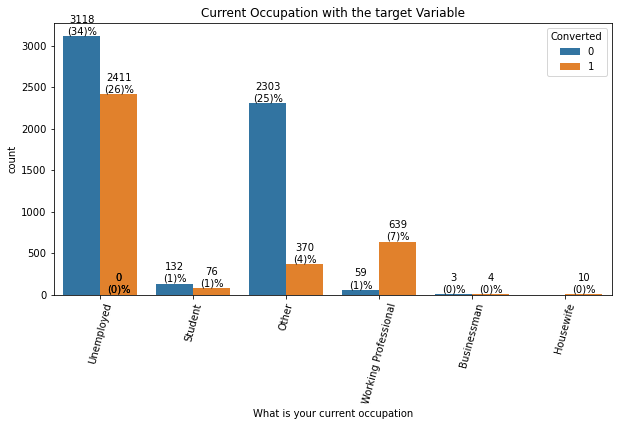

In [77]:
# Analysing the 'What is your current occupation' with the target Variable
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_leads, x='What is your current occupation', hue='Converted')
for i in ax.patches:
        ax.annotate('{:0.0f}\n({:0.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['What is your current occupation'])), (i.get_x()+0.20, i.get_height()+0.50), ha = 'center', va = 'bottom')
plt.title('Current Occupation with the target Variable')
plt.xticks(rotation = 75)
plt.show()

In [78]:
# conversion rate for leads who are unemployed
conversion_rate_of_Unemployed = len(df_leads[(df_leads['What is your current occupation'] == 'Unemployed')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['What is your current occupation'] == 'Unemployed')])
print('Conversion Rate of Leads are unemployed', round(conversion_rate_of_Unemployed*100))

Conversion Rate of Leads are unemployed 44


##### Observation
1. Unemployed users are the majority of the Leads but only 44% are converted.
2. We should focus on converting these set of users and increase out conversion percent.

##### What matters most to you in choosing a course

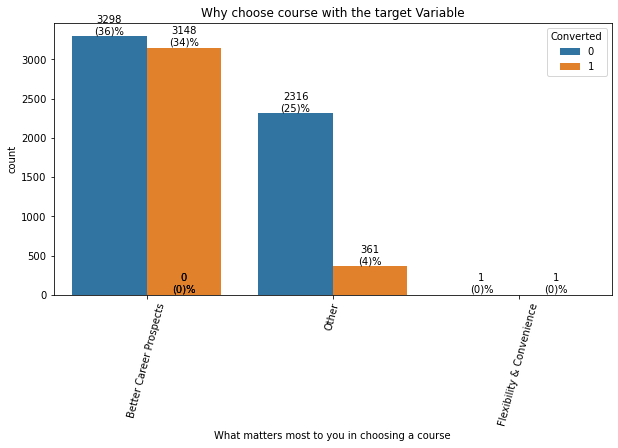

In [79]:
# Analysing the 'Do Not Email' with the target Variable
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_leads, x='What matters most to you in choosing a course', hue='Converted')
for i in ax.patches:
        ax.annotate('{:0.0f}\n({:0.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['What matters most to you in choosing a course'])), (i.get_x()+0.20, i.get_height()+0.50), ha = 'center', va = 'bottom')
plt.title('Why choose course with the target Variable')
plt.xticks(rotation = 75)
plt.show()

In [80]:
# conversion rate for leads who want Better Career Prospects
conversion_rate_of_Bettercareer = len(df_leads[(df_leads['What matters most to you in choosing a course'] == 'Better Career Prospects')][(df_leads['Converted'] == 1)])/len(df_leads[(df_leads['What matters most to you in choosing a course'] == 'Better Career Prospects')])
print('Conversion Rate of Leads who want Better Career Prospects', round(conversion_rate_of_Bettercareer*100))

Conversion Rate of Leads who want Better Career Prospects 49


##### Observation
1. More than 70% of the Leads want to opt for course for Better Career Prospects but only 49% are converted

##### A free copy of Mastering The Interview 

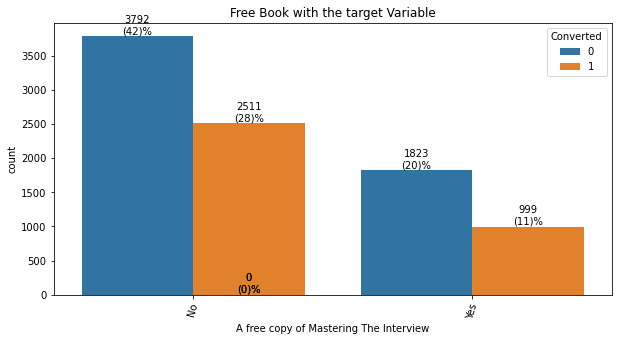

In [81]:
# Analysing the 'A free copy of Mastering The Interview ' with the target Variable
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_leads, x='A free copy of Mastering The Interview', hue='Converted')
for i in ax.patches:
        ax.annotate('{:0.0f}\n({:0.0f})%'.format(i.get_height(),i.get_height()*100/len(df_leads['A free copy of Mastering The Interview'])), (i.get_x()+0.20, i.get_height()+0.50), ha = 'center', va = 'bottom')
plt.title('Free Book with the target Variable')
plt.xticks(rotation = 75)
plt.show()

##### Observation
1. Looking at the data, most of the Leads do not opt for Free Books.
2. And for those who opted for free books, only 50% get converted.

### Bivariate Analysis

In [82]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9125 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9125 non-null   object 
 1   Lead Source                                    9125 non-null   object 
 2   Do Not Email                                   9125 non-null   object 
 3   Converted                                      9125 non-null   int64  
 4   TotalVisits                                    9125 non-null   float64
 5   Total Time Spent on Website                    9125 non-null   int64  
 6   Page Views Per Visit                           9125 non-null   float64
 7   Last Activity                                  9125 non-null   object 
 8   Specialization                                 9125 non-null   object 
 9   What is your current occupation                9125 

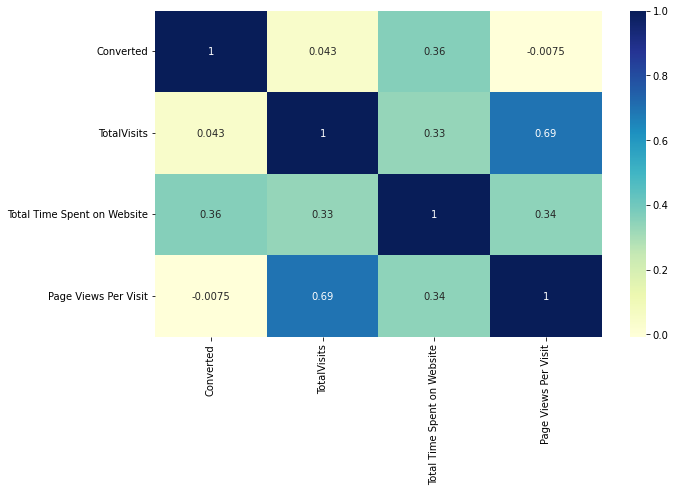

In [83]:
# Check the Correlation among the numerical variables
plt.figure(figsize = (10,6))
sns.heatmap(data= df_leads.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

#### Observations:
1. There is high correlation of around 70% in Total Vists and Pages Views per visit
2. Looking at the data, we can see the total visit and converted have less small correlation whereas have moderate correlation with 'Total time spent on the Website'.

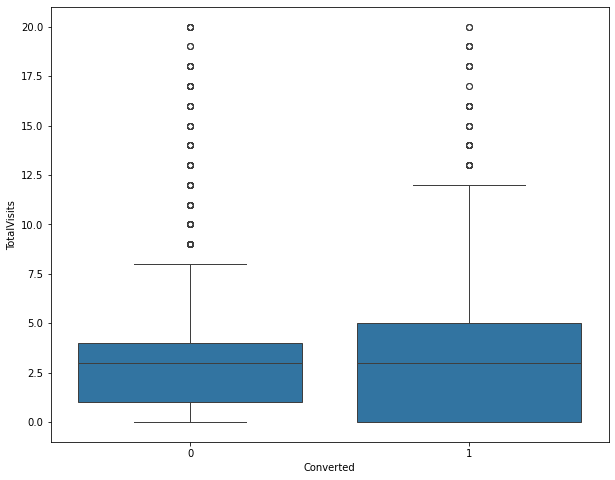

In [84]:
# Lets focus on Total Visit and Converted variable are correlated
plt.figure(figsize = (10,8))
sns.boxplot(data=df_leads, x='Converted', y = 'TotalVisits')
plt.show()

Observations:
1. Leads that are converted have more number of visits, hence company should focus on Leads who are visiting the site more than others

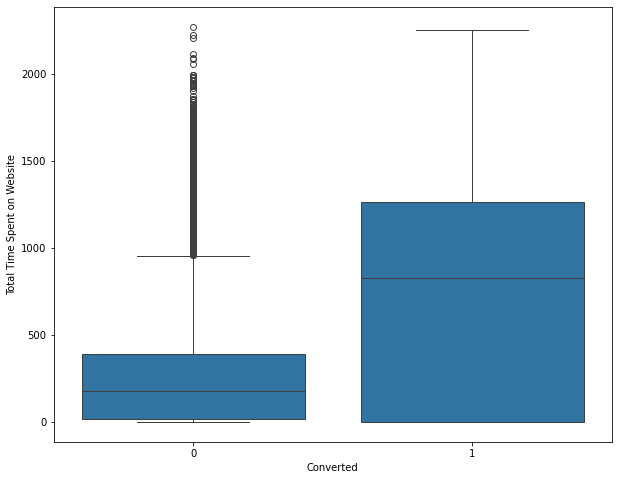

In [85]:
# visualize Total Time Spent on Website and Converted variable are correlated
plt.figure(figsize = (10,8))
sns.boxplot(data=df_leads, x='Converted', y = 'Total Time Spent on Website')
plt.show()

Observations:
1. Leads that are converted have spent more time on the Website than others, hence company should focus on such Leads as they have high chance of converting

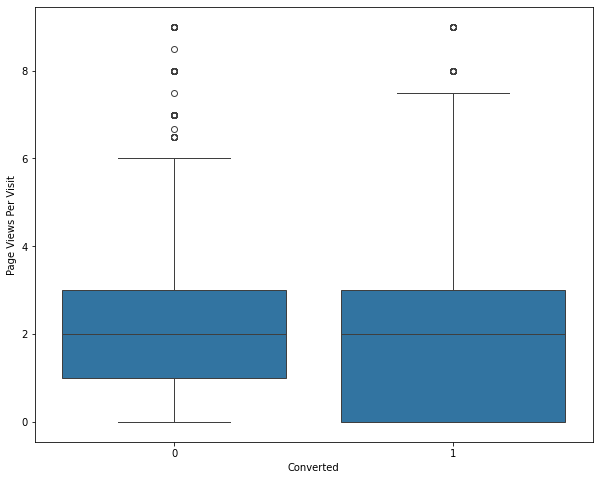

In [86]:
# visualize Pages View per Visit and Converted variable are correlated
plt.figure(figsize = (10,8))
sns.boxplot(data=df_leads, x='Converted', y = 'Page Views Per Visit')
plt.show()

Observations:
1. Pages Viewd per visit does not show any remarkable difference between who are converted to those who are not converted

## Data Preparation for Modeling

#### Converting Yes/no to Binary 1/0


In [87]:
# list all the variables which have yes/no values
var_yn = ['Do Not Email', 'A free copy of Mastering The Interview']

# Create a Binary Map function to converts yes/no values to 1/0 values
def convert_to_binary(x):
    return x.map({'Yes':1, 'No':0})

# call the binary map function for all the columns
df_leads[var_yn] = df_leads[var_yn].apply(convert_to_binary)

In [88]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0

#### Creating dummy variables for the categorical coolumns with multiple levels

In [89]:
# create a list of the columns which have multiple categorical levels
columns_categorical = df_leads.select_dtypes(include='object').columns
columns_categorical

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')

In [90]:
# creating the dummies for each of the columns
df_leads = pd.get_dummies(data=df_leads,columns=columns_categorical, drop_first=True)
df_leads.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page

In [91]:
df_leads.shape

(9125, 52)

In [92]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9125 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9125 non-null   int64  
 1   Converted                                                                9125 non-null   int64  
 2   TotalVisits                                                              9125 non-null   float64
 3   Total Time Spent on Website                                              9125 non-null   int64  
 4   Page Views Per Visit                                                     9125 non-null   float64
 5   A free copy of Mastering The Interview                                   9125 non-null   int64  
 6   Lead Origin_Landing Page Submission                                     

### Splitting the Data in Train and Test datasets

In [93]:
# spliting the dataset into train and test data

df_train, df_test = train_test_split(df_leads, train_size=0.7, random_state=100)

In [94]:
# shape of train and test datasets

print('Train dataset - ', df_train.shape)
print('Test dataset - ', df_test.shape)

Train dataset -  (6387, 52)
Test dataset -  (2738, 52)


In [95]:
# showing the head of the dataset
df_train.head(3)

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
6161             0          0          3.0                           90   
1435             0          0          2.0                          291   
9211             0          1          4.0                         1112   

      Page Views Per Visit  A free copy of Mastering The Interview  \
6161                   3.0                                       1   
1435                   2.0                                       0   
9211                   4.0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6161                                    1                          0   
1435                                    1                          0   
9211                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
6161                        0                           0                   0   
1435                        0                           0                   0   
9211                        0                           0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
6161                       0                           0                   0   
1435                       0                           0                   0   
9211                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
6161                      0                           0   
1435                      0                           0   
9211                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
6161                             0                            0   
1435                             0                            0   
9211                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
6161                                 1                           0   
1435                                 0                           0   
9211                                 0                           0   

      Last Activity_Form Submitted on Website  \
6161                                        0   
1435                                        0   
9211                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
6161                                      0                     0   
1435                                      0                     0   
9211                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
6161                                      0                       0   
1435                                      0                       1   
9211                                      0                       1   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
6161                          0                           0   
1435                          0                           0   
9211                          0                           0   

      Specialization_Business Administration  Specialization_E-Business  \
6161                                       0                          0   
1435                                       0                          0   
9211                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
6161                          0                                  1   
1435                          0                                  0   
9211                          0                                  0   

      Specialization_Healthcare Management  \
6161                                     0   
1435            

### Perform Feature Scaling of the datasets

In [96]:
# list the numerical variables that should be scaled

vars_scales = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

In [97]:
# scale the numerical variables using MinMaxScaler

scaler = MinMaxScaler()
df_train[vars_scales] = scaler.fit_transform(df_train[vars_scales])

In [98]:
#showing the head of the train dataset after scaling

df_train.head(3)

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
6161             0          0         0.15                     0.039947   
1435             0          0         0.10                     0.129161   
9211             0          1         0.20                     0.493564   

      Page Views Per Visit  A free copy of Mastering The Interview  \
6161              0.333333                                       1   
1435              0.222222                                       0   
9211              0.444444                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6161                                    1                          0   
1435                                    1                          0   
9211                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
6161                        0                           0                   0   
1435                        0                           0                   0   
9211                        0                           0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
6161                       0                           0                   0   
1435                       0                           0                   0   
9211                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
6161                      0                           0   
1435                      0                           0   
9211                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
6161                             0                            0   
1435                             0                            0   
9211                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
6161                                 1                           0   
1435                                 0                           0   
9211                                 0                           0   

      Last Activity_Form Submitted on Website  \
6161                                        0   
1435                                        0   
9211                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
6161                                      0                     0   
1435                                      0                     0   
9211                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
6161                                      0                       0   
1435                                      0                       1   
9211                                      0                       1   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
6161                          0                           0   
1435                          0                           0   
9211                          0                           0   

      Specialization_Business Administration  Specialization_E-Business  \
6161                                       0                          0   
1435                                       0                          0   
9211                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
6161                          0                                  1   
1435                          0                                  0   
9211                          0                                  0   

      Specialization_Healthcare Management  \
6161                                     0   
1435            

In [99]:
# Performing scaling on test dataframe as well. We will be using above scaler object to scale the test dataframe

df_test[vars_scales] = scaler.transform(df_test[vars_scales])

In [100]:
# showing the head of the test datafame after scaling
df_test.head(3)

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
4539             0          1         0.00                     0.000000   
3836             0          1         0.20                     0.450067   
2538             0          0         0.25                     0.870395   

      Page Views Per Visit  A free copy of Mastering The Interview  \
4539              0.000000                                       0   
3836              0.222222                                       0   
2538              0.555556                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4539                                    0                          0   
3836                                    0                          0   
2538                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
4539                        0                           0                   0   
3836                        0                           0                   1   
2538                        0                           0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4539                       1                           0                   0   
3836                       0                           0                   0   
2538                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4539                      0                           0   
3836                      0                           0   
2538                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4539                             0                            0   
3836                             0                            0   
2538                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4539                                 0                           0   
3836                                 0                           0   
2538                                 0                           0   

      Last Activity_Form Submitted on Website  \
4539                                        0   
3836                                        0   
2538                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4539                                      0                     0   
3836                                      0                     0   
2538                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
4539                                      0                       1   
3836                                      1                       0   
2538                                      0                       1   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
4539                          0                           0   
3836                          0                           0   
2538                          0                           0   

      Specialization_Business Administration  Specialization_E-Business  \
4539                                       0                          0   
3836                                       0                          0   
2538                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
4539                          0                                  0   
3836                          0                                  0   
2538                          0                                  0   

      Specialization_Healthcare Management  \
4539                                     0   
3836            

### Creating the X and y variables for both train and test dataset

In [101]:
# creating the X and y variable for Train dataset
y_train = df_train.pop('Converted')
X_train = df_train

In [102]:
# creating the X and y variable for test dataset
y_test = df_test.pop('Converted')
X_test = df_test

### Feature Selection

#### Analysing correlatiion in the dependent variables

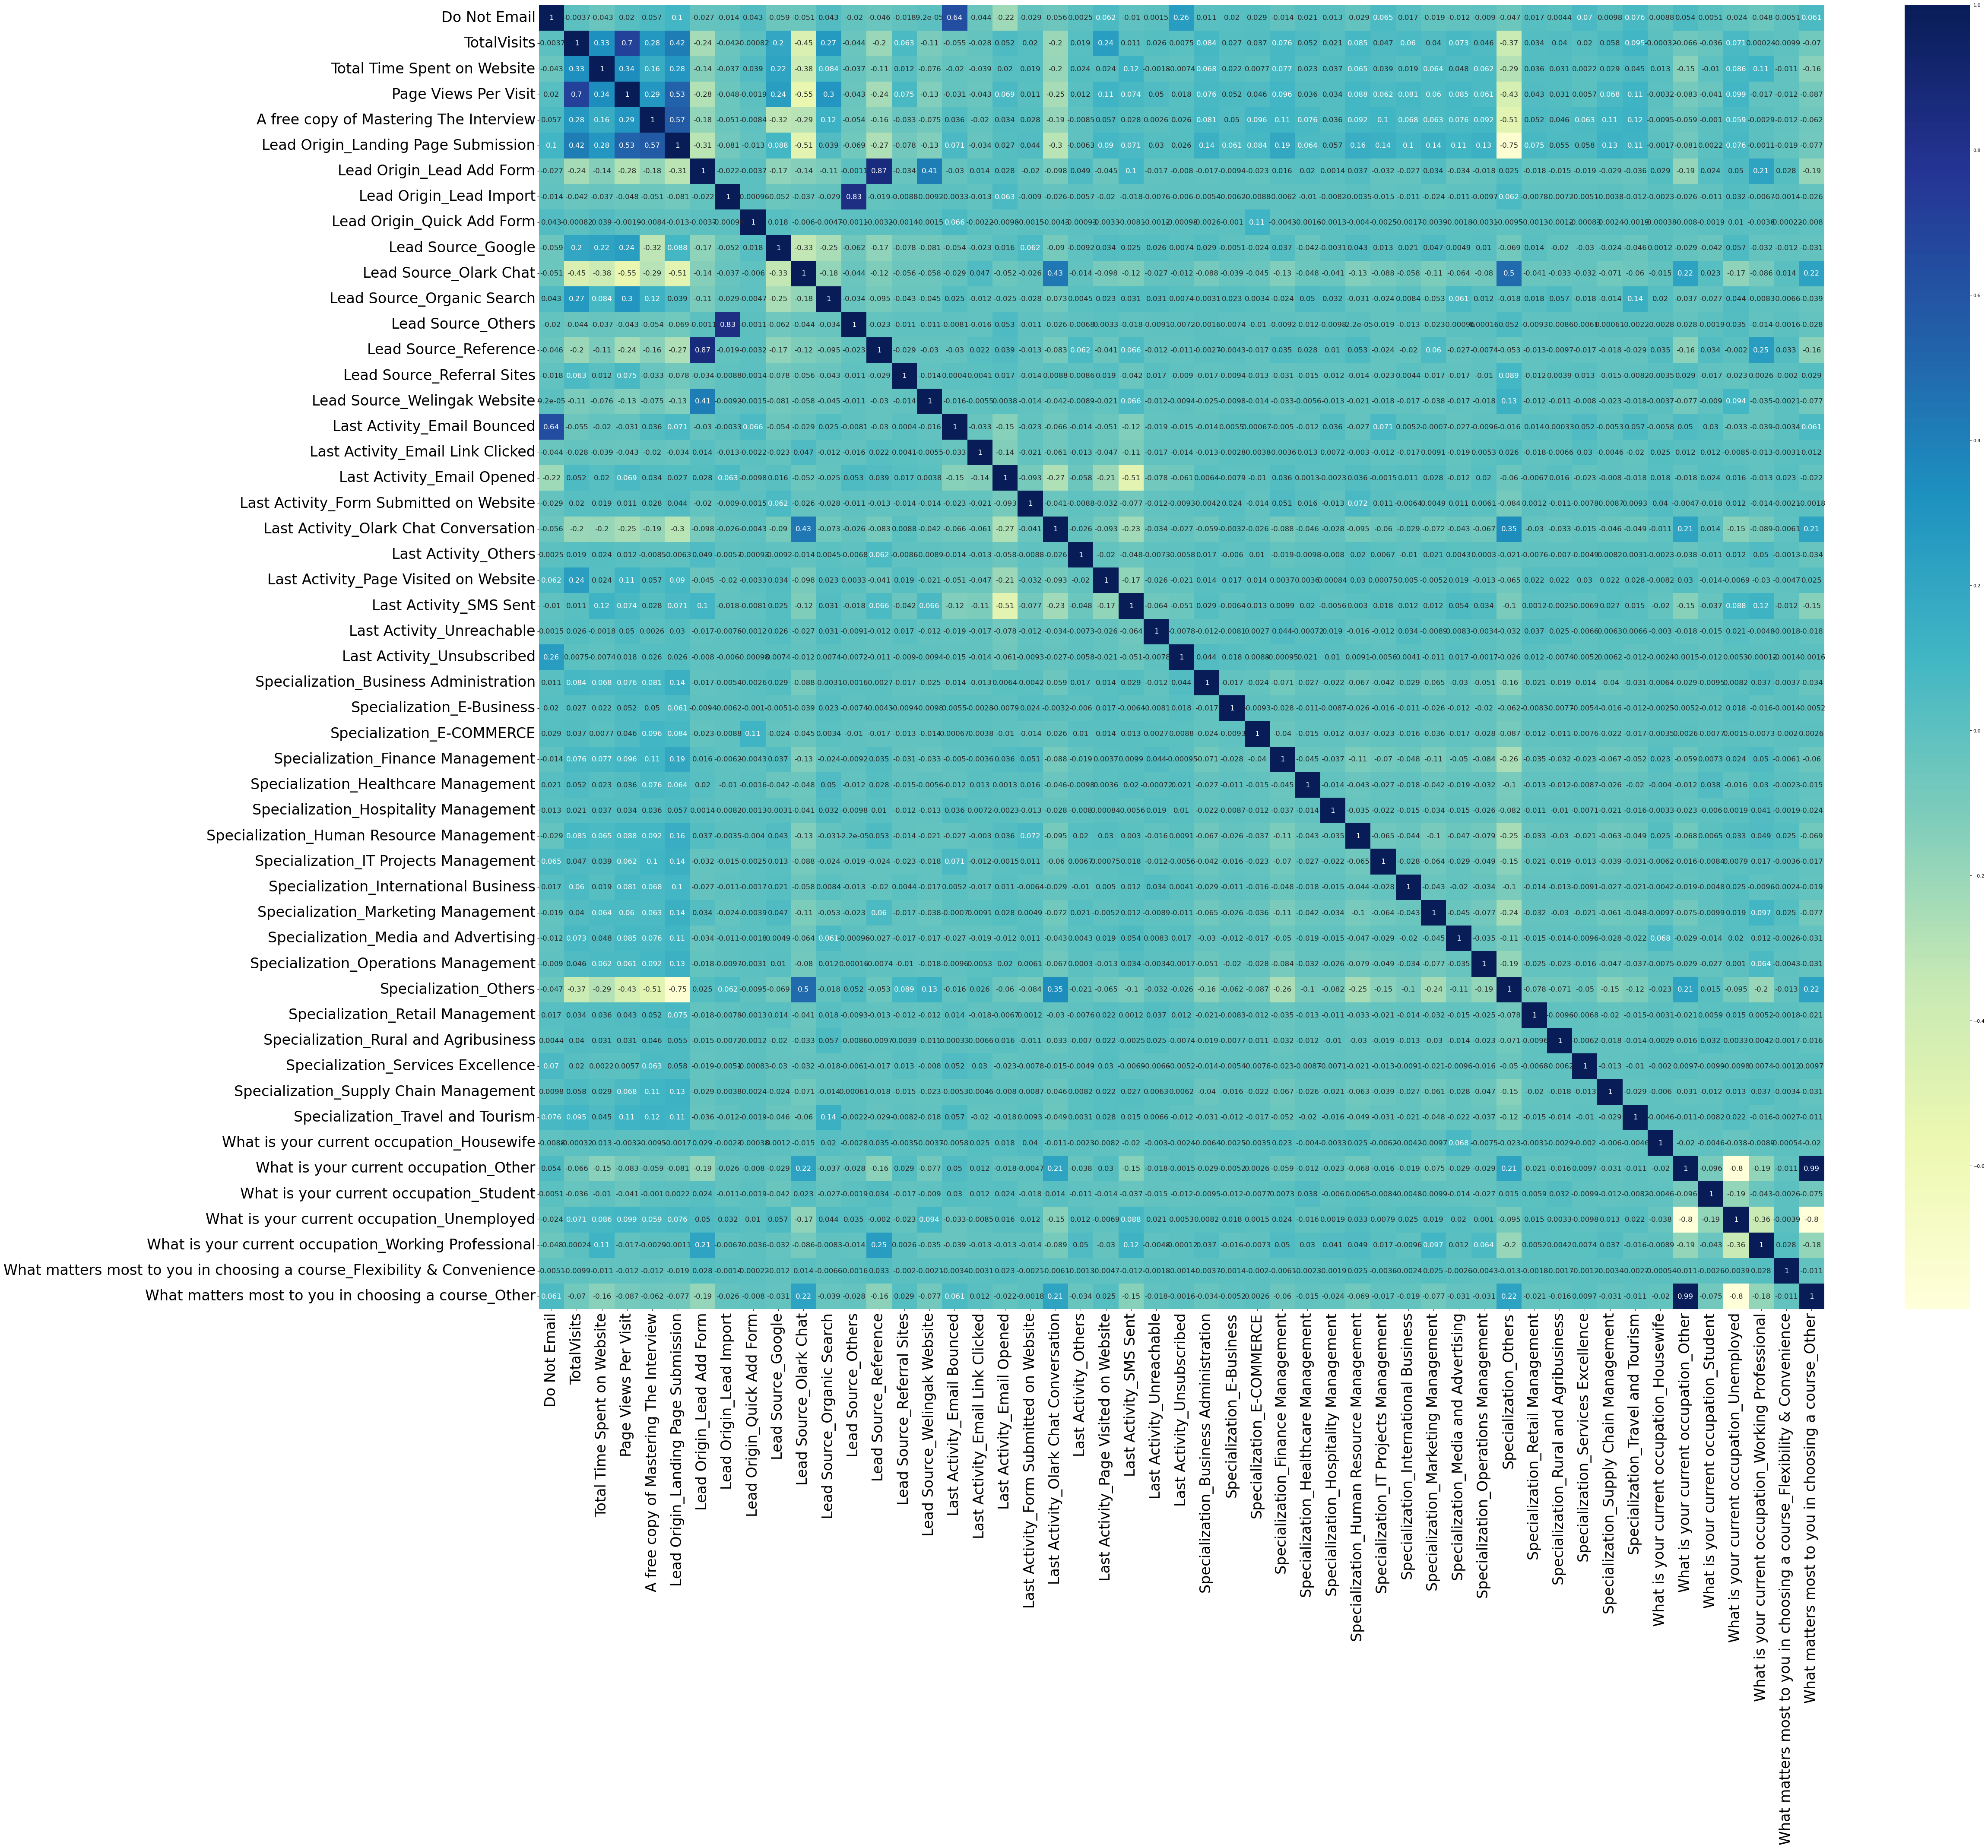

In [103]:
# creating a heatmap to check the correlation among all the dependent variables. 
plt.figure(figsize = (60,50), dpi=80)
sns.heatmap(data=df_train.corr(), annot=True, cmap='YlGnBu', annot_kws={'size':15})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

##### Observations
There are few variables which are highly correlated.
1. TotalVisits and Page Views per visits have high correlation of 0.70
2. Do Not Email and Last Activity - Email Bounced are highly correlated 0.64 
3. Lead Origin - Landing Page Submission and Page Views per Visits 
4. Lead Source - Reference and Lead Origin - Lead Add Form 



#### Perform Feature selection using RFE

In [104]:
# Out of 52 variables, lets select 20 variables using RFE
# Creating the Linearregression object linear
linear = LinearRegression()

# creating RFE object using the linear object with 20 features
rfe = RFE(linear, n_features_to_select=20)

# the fit and transform using X_train and y_train 
rfe = rfe.fit(X_train, y_train)

In [105]:
# creating the list of features that are selcted using RFE along with their rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Others', False, 11),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_SMS

In [106]:
#columns selected by RFE

cols_selected = X_train.columns[rfe.support_]
cols_selected

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other'],
      dtype='object')

In [107]:
# columns not selected by RFE
cols_not_selected = X_train.columns[~rfe.support_]
cols_not_selected

Index(['A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Sp

In [108]:
# create the dataframe using the rfe selected columns
X_train_rfe = X_train[cols_selected]

In [109]:
# getting the shape of the dataframe we get after feature selection
X_train_rfe.shape

(6387, 20)

#### Creating the VIF function to calculate the correlation among the dependent variables

In [110]:
# Creating the function to calculate the correlation among the dependent variables using the variance inflation factor

def vif_check(data):
    df_vif = pd.DataFrame(columns=['Features', 'VIF'])
    df_vif['Features'] = X_train_rfe.columns
    df_vif['VIF'] = [ variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'],2)
    df_vif = df_vif.sort_values(by='VIF', ascending=False)
    return df_vif

## Model Building

#### Model 1

In [111]:
# For using the statsmodel library we have to add a constant 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# building the model
logmodel1 = sm.GLM(y_train, X_train_rfe_sm, family= sm.families.Binomial()).fit()

# getting the summary of the model
logmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6387
Model:                            GLM   Df Residuals:                     6366
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.7
Date:                Mon, 15 Apr 2024   Deviance:                       5081.5
Time:                        21:07:46   Pearson chi2:                 7.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4184
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.9918      0.170    -11.706      0.000      -2.325      -1.658
Do Not Email                                                               -1.2230      0.191     -6.418      0.000      -1.596      -0.850
TotalVisits                                                                 1.8856      0.319      5.908      0.000       1.260       2.511
Total Time Spent on Website                                                 4.4073      0.169     26.122      0.000       4.077       4.738
Page Views Per Visit                                                       -1.1976      0.264     -4.534      0.000      -1.715      -0.680
Lead Origin_Landing Page Submission                                        -0.9732      0.131     -7.445      0.000      -1.229      -0.717
Lead Origin_Lead Add Form                                                   3.5309      0.673      5.250      0.000       2.213       4.849
Lead Origin_Quick Add Form                                                 21.4272   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                                      1.1004      0.138      8.002      0.000       0.831       1.370
Lead Source_Reference                                                      -0.8303      0.694     -1.196      0.232      -2.190       0.530
Lead Source_Welingak Website                                                2.4493      1.214      2.018      0.044       0.070       4.828
Last Activity_Email Opened                                                  1.0296      0.099     10.430      0.000       0.836       1.223
Last Activity_Others                                                        1.8599      0.495      3.759      0.000       0.890       2.830
Last Activity_SMS Sent                                                      2.2710      0.103     21.958      0.000       2.068       2.474
Last Activity_Unreachable                                                   1.1699      0.330      3.547      0.000       0.523       1.816
Last Activity_Unsubscribed                                                  1.8609      0.487      3.819      0.000       0.906       2.816
Specialization_Others                                                      -0.9747      0.127     -7.656      0.000      -1.224      -0.725
What is your current occupation_Housewife                                  22.8544    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
What is your current occupation_Working Professional                        2.2897      0.196     11.685      0.000       1.906       2.674
Wha

In [112]:
# calculating the VIF score for remaining dependent variable to check the multicollinearity within themselves
vif_check(X_train_rfe_sm)

Features    VIF
5                           Lead Origin_Lead Add Form  18.54
8                               Lead Source_Reference  14.97
3                                Page Views Per Visit   6.04
9                        Lead Source_Welingak Website   4.26
1                                         TotalVisits   4.19
4                 Lead Origin_Landing Page Submission   4.06
15                              Specialization_Others   2.71
10                         Last Activity_Email Opened   2.31
2                         Total Time Spent on Website   2.20
12                             Last Activity_SMS Sent   2.09
7                              Lead Source_Olark Chat   2.00
19  What matters most to you in choosing a course_...   1.62
0                                        Do Not Email   1.25
17  What is your current occupation_Working Profes...   1.24
14                         Last Activity_Unsubscribed   1.08
13                          Last Activity_Unreachable   1.04
11                               Last Activity_Others   1.03
6                          Lead Origin_Quick Add Form   1.01
16          What is your current occupation_Housewife   1.00
18  What matters most to you in choosing a course_...   1.00

##### Observations
1. Since the variable 'Lead Origin_Quick Add Form' has p-value of 1, we can drop this columns and calculate the model again

#### Model 2

In [113]:
# dropping the 'Lead Origin_Quick Add Form' column
X_train_rfe = X_train_rfe.drop(columns=['Lead Origin_Quick Add Form'], axis=1)

In [114]:
# creating the model again 

# For using the statsmodel library we have to add a constant 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# building the model
logmodel2 = sm.GLM(y_train, X_train_rfe_sm, family= sm.families.Binomial()).fit()

# getting the summary of the model
logmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6387
Model:                            GLM   Df Residuals:                     6367
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.0
Date:                Mon, 15 Apr 2024   Deviance:                       5082.0
Time:                        21:07:46   Pearson chi2:                 7.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4184
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.9886      0.170    -11.693      0.000      -2.322      -1.655
Do Not Email                                                               -1.2149      0.190     -6.403      0.000      -1.587      -0.843
TotalVisits                                                                 1.8844      0.319      5.904      0.000       1.259       2.510
Total Time Spent on Website                                                 4.4115      0.169     26.166      0.000       4.081       4.742
Page Views Per Visit                                                       -1.1983      0.264     -4.536      0.000      -1.716      -0.681
Lead Origin_Landing Page Submission                                        -0.9767      0.131     -7.478      0.000      -1.233      -0.721
Lead Origin_Lead Add Form                                                   3.5269      0.672      5.247      0.000       2.209       4.844
Lead Source_Olark Chat                                                      1.1000      0.138      7.998      0.000       0.830       1.370
Lead Source_Reference                                                      -0.8281      0.694     -1.194      0.233      -2.188       0.532
Lead Source_Welingak Website                                                2.4514      1.214      2.020      0.043       0.073       4.830
Last Activity_Email Opened                                                  1.0289      0.099     10.424      0.000       0.835       1.222
Last Activity_Others                                                        1.8587      0.495      3.756      0.000       0.889       2.829
Last Activity_SMS Sent                                                      2.2701      0.103     21.954      0.000       2.067       2.473
Last Activity_Unreachable                                                   1.1691      0.330      3.544      0.000       0.523       1.816
Last Activity_Unsubscribed                                                  1.8526      0.487      3.804      0.000       0.898       2.807
Specialization_Others                                                      -0.9774      0.127     -7.682      0.000      -1.227      -0.728
What is your current occupation_Housewife                                  22.8543    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
What is your current occupation_Working Professional                        2.2891      0.196     11.681      0.000       1.905       2.673
What matters most to you in choosing a course_Flexibility & Convenience    -2.3646      2.388     -0.990      0.322      -7.045       2.316
Wha

In [115]:
# calculating the VIF score for remaining dependent variable to check the multicollinearity within themselves
vif_check(X_train_rfe_sm)

Features    VIF
5                           Lead Origin_Lead Add Form  18.54
7                               Lead Source_Reference  14.97
3                                Page Views Per Visit   6.04
8                        Lead Source_Welingak Website   4.26
1                                         TotalVisits   4.19
4                 Lead Origin_Landing Page Submission   4.05
14                              Specialization_Others   2.71
9                          Last Activity_Email Opened   2.31
2                         Total Time Spent on Website   2.19
11                             Last Activity_SMS Sent   2.09
6                              Lead Source_Olark Chat   2.00
18  What matters most to you in choosing a course_...   1.62
0                                        Do Not Email   1.25
16  What is your current occupation_Working Profes...   1.24
13                         Last Activity_Unsubscribed   1.08
12                          Last Activity_Unreachable   1.04
10                               Last Activity_Others   1.03
15          What is your current occupation_Housewife   1.00
17  What matters most to you in choosing a course_...   1.00

##### Observations
1. Since the variable 'What is your current occupation_Housewife' has p-value of 0.999, we can drop this columns and calculate the model again

#### Model 3

In [116]:
# dropping the 'Lead Origin_Quick Add Form' column
X_train_rfe = X_train_rfe.drop(columns=['What is your current occupation_Housewife'], axis=1)

In [117]:
# creating the model again 

# For using the statsmodel library we have to add a constant 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# building the model
logmodel3 = sm.GLM(y_train, X_train_rfe_sm, family= sm.families.Binomial()).fit()

# getting the summary of the model
logmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6387
Model:                            GLM   Df Residuals:                     6368
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.6
Date:                Mon, 15 Apr 2024   Deviance:                       5091.3
Time:                        21:07:47   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4176
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.9745      0.170    -11.632      0.000      -2.307      -1.642
Do Not Email                                                               -1.2188      0.190     -6.427      0.000      -1.591      -0.847
TotalVisits                                                                 1.8749      0.319      5.879      0.000       1.250       2.500
Total Time Spent on Website                                                 4.4067      0.168     26.173      0.000       4.077       4.737
Page Views Per Visit                                                       -1.2025      0.264     -4.555      0.000      -1.720      -0.685
Lead Origin_Landing Page Submission                                        -0.9748      0.130     -7.472      0.000      -1.231      -0.719
Lead Origin_Lead Add Form                                                   3.5258      0.672      5.245      0.000       2.208       4.843
Lead Source_Olark Chat                                                      1.0953      0.137      7.971      0.000       0.826       1.365
Lead Source_Reference                                                      -0.8190      0.694     -1.181      0.238      -2.179       0.541
Lead Source_Welingak Website                                                2.4484      1.214      2.018      0.044       0.070       4.827
Last Activity_Email Opened                                                  1.0240      0.098     10.401      0.000       0.831       1.217
Last Activity_Others                                                        1.8501      0.495      3.738      0.000       0.880       2.820
Last Activity_SMS Sent                                                      2.2615      0.103     21.919      0.000       2.059       2.464
Last Activity_Unreachable                                                   1.1600      0.330      3.517      0.000       0.514       1.806
Last Activity_Unsubscribed                                                  1.8476      0.487      3.795      0.000       0.893       2.802
Specialization_Others                                                      -0.9817      0.127     -7.721      0.000      -1.231      -0.733
What is your current occupation_Working Professional                        2.2828      0.196     11.653      0.000       1.899       2.667
What matters most to you in choosing a course_Flexibility & Convenience    -2.3709      2.390     -0.992      0.321      -7.055       2.313
What matters most to you in choosing a course_Other                        -1.2835      0.090    -14.273      0.000      -1.460      -1.107
===

In [118]:
# calculating the VIF score for remaining dependent variable to check the multicollinearity within themselves
vif_check(X_train_rfe_sm)

Features    VIF
5                           Lead Origin_Lead Add Form  18.54
7                               Lead Source_Reference  14.96
3                                Page Views Per Visit   6.04
8                        Lead Source_Welingak Website   4.26
1                                         TotalVisits   4.19
4                 Lead Origin_Landing Page Submission   4.05
14                              Specialization_Others   2.71
9                          Last Activity_Email Opened   2.31
2                         Total Time Spent on Website   2.19
11                             Last Activity_SMS Sent   2.09
6                              Lead Source_Olark Chat   2.00
17  What matters most to you in choosing a course_...   1.62
0                                        Do Not Email   1.25
15  What is your current occupation_Working Profes...   1.23
13                         Last Activity_Unsubscribed   1.08
12                          Last Activity_Unreachable   1.04
10                               Last Activity_Others   1.03
16  What matters most to you in choosing a course_...   1.00

##### Observations
1. Since the variable 'What matters most to you in choosing a course_Flexibility & Convenience' has p-value of 0.321, we can drop this columns and calculate the model again

#### Model 4

In [119]:
# dropping the 'Lead Origin_Quick Add Form' column
X_train_rfe = X_train_rfe.drop(columns=['What matters most to you in choosing a course_Flexibility & Convenience'], axis=1)

In [120]:
# creating the model again 

# For using the statsmodel library we have to add a constant 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# building the model
logmodel4 = sm.GLM(y_train, X_train_rfe_sm, family= sm.families.Binomial()).fit()

# getting the summary of the model
logmodel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6387
Model:                            GLM   Df Residuals:                     6369
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.2
Date:                Mon, 15 Apr 2024   Deviance:                       5092.4
Time:                        21:07:47   Pearson chi2:                 7.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4174
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9785      0.170    -11.661      0.000      -2.311      -1.646
Do Not Email                                            -1.2188      0.190     -6.428      0.000      -1.590      -0.847
TotalVisits                                              1.8756      0.319      5.882      0.000       1.251       2.501
Total Time Spent on Website                              4.4068      0.168     26.177      0.000       4.077       4.737
Page Views Per Visit                                    -1.2020      0.264     -4.554      0.000      -1.719      -0.685
Lead Origin_Landing Page Submission                     -0.9701      0.130     -7.444      0.000      -1.226      -0.715
Lead Origin_Lead Add Form                                3.5247      0.672      5.244      0.000       2.207       4.842
Lead Source_Olark Chat                                   1.0921      0.137      7.951      0.000       0.823       1.361
Lead Source_Reference                                   -0.8186      0.694     -1.180      0.238      -2.178       0.541
Lead Source_Welingak Website                             2.4485      1.213      2.018      0.044       0.070       4.827
Last Activity_Email Opened                               1.0221      0.098     10.386      0.000       0.829       1.215
Last Activity_Others                                     1.8500      0.495      3.739      0.000       0.880       2.820
Last Activity_SMS Sent                                   2.2607      0.103     21.917      0.000       2.059       2.463
Last Activity_Unreachable                                1.1596      0.330      3.517      0.000       0.513       1.806
Last Activity_Unsubscribed                               1.8474      0.487      3.795      0.000       0.893       2.801
Specialization_Others                                   -0.9756      0.127     -7.687      0.000      -1.224      -0.727
What is your current occupation_Working Professional     2.2808      0.196     11.648      0.000       1.897       2.665
What matters most to you in choosing a course_Other     -1.2830      0.090    -14.268      0.000      -1.459      -1.107
========================================================================================================================
"""

In [121]:
# calculating the VIF score for remaining dependent variable to check the multicollinearity within themselves
vif_check(X_train_rfe_sm)

Features    VIF
5                           Lead Origin_Lead Add Form  18.54
7                               Lead Source_Reference  14.96
3                                Page Views Per Visit   6.04
8                        Lead Source_Welingak Website   4.26
1                                         TotalVisits   4.19
4                 Lead Origin_Landing Page Submission   4.05
14                              Specialization_Others   2.71
9                          Last Activity_Email Opened   2.31
2                         Total Time Spent on Website   2.19
11                             Last Activity_SMS Sent   2.09
6                              Lead Source_Olark Chat   2.00
16  What matters most to you in choosing a course_...   1.62
0                                        Do Not Email   1.25
15  What is your current occupation_Working Profes...   1.23
13                         Last Activity_Unsubscribed   1.08
12                          Last Activity_Unreachable   1.04
10                               Last Activity_Others   1.03

##### Observations
1. Since the variable 'Lead Source_Reference' has p-value of 0.238, we can drop this columns and calculate the model again

#### Model 5

In [122]:
# dropping the 'Lead Origin_Quick Add Form' column
X_train_rfe = X_train_rfe.drop(columns=['Lead Source_Reference'], axis=1)

In [123]:
# creating the model again 

# For using the statsmodel library we have to add a constant 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# building the model
logmodel5 = sm.GLM(y_train, X_train_rfe_sm, family= sm.families.Binomial()).fit()

# getting the summary of the model
logmodel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6387
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.0
Date:                Mon, 15 Apr 2024   Deviance:                       5094.0
Time:                        21:07:47   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4173
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9934      0.169    -11.771      0.000      -2.325      -1.661
Do Not Email                                            -1.1908      0.187     -6.378      0.000      -1.557      -0.825
TotalVisits                                              1.8806      0.319      5.899      0.000       1.256       2.505
Total Time Spent on Website                              4.4082      0.168     26.183      0.000       4.078       4.738
Page Views Per Visit                                    -1.2001      0.264     -4.548      0.000      -1.717      -0.683
Lead Origin_Landing Page Submission                     -0.9593      0.130     -7.379      0.000      -1.214      -0.704
Lead Origin_Lead Add Form                                2.7911      0.219     12.762      0.000       2.362       3.220
Lead Source_Olark Chat                                   1.0928      0.137      7.960      0.000       0.824       1.362
Lead Source_Welingak Website                             3.1749      1.037      3.063      0.002       1.143       5.207
Last Activity_Email Opened                               1.0216      0.098     10.379      0.000       0.829       1.215
Last Activity_Others                                     1.8421      0.496      3.716      0.000       0.871       2.814
Last Activity_SMS Sent                                   2.2625      0.103     21.945      0.000       2.060       2.465
Last Activity_Unreachable                                1.1596      0.330      3.516      0.000       0.513       1.806
Last Activity_Unsubscribed                               1.8533      0.481      3.849      0.000       0.910       2.797
Specialization_Others                                   -0.9596      0.126     -7.596      0.000      -1.207      -0.712
What is your current occupation_Working Professional     2.2790      0.196     11.636      0.000       1.895       2.663
What matters most to you in choosing a course_Other     -1.2843      0.090    -14.285      0.000      -1.461      -1.108
========================================================================================================================
"""

In [124]:
# calculating the VIF score for remaining dependent variable to check the multicollinearity within themselves
vif_check(X_train_rfe_sm)

Features   VIF
3                                Page Views Per Visit  6.03
1                                         TotalVisits  4.19
4                 Lead Origin_Landing Page Submission  4.05
13                              Specialization_Others  2.69
8                          Last Activity_Email Opened  2.31
2                         Total Time Spent on Website  2.19
10                             Last Activity_SMS Sent  2.09
6                              Lead Source_Olark Chat  1.99
15  What matters most to you in choosing a course_...  1.62
5                           Lead Origin_Lead Add Form  1.59
7                        Lead Source_Welingak Website  1.28
0                                        Do Not Email  1.25
14  What is your current occupation_Working Profes...  1.23
12                         Last Activity_Unsubscribed  1.08
11                          Last Activity_Unreachable  1.04
9                                Last Activity_Others  1.03

##### Observations
1. Since the variable 'Page Views Per Visit' has p-value of 0, But the VIF score is more than 6. So in order to remove the multicollinearity, we can drop this columns and calculate the model again

#### Model 6

In [125]:
# dropping the 'Lead Origin_Quick Add Form' column
X_train_rfe = X_train_rfe.drop(columns=['Page Views Per Visit'], axis=1)

In [126]:
# creating the model again 

# For using the statsmodel library we have to add a constant 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# building the model
logmodel6 = sm.GLM(y_train, X_train_rfe_sm, family= sm.families.Binomial()).fit()

# getting the summary of the model
logmodel6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6387
Model:                            GLM   Df Residuals:                     6371
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.5
Date:                Mon, 15 Apr 2024   Deviance:                       5115.0
Time:                        21:07:47   Pearson chi2:                 7.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4154
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1758      0.165    -13.212      0.000      -2.499      -1.853
Do Not Email                                            -1.1994      0.187     -6.425      0.000      -1.565      -0.834
TotalVisits                                              1.1599      0.277      4.193      0.000       0.618       1.702
Total Time Spent on Website                              4.3966      0.168     26.144      0.000       4.067       4.726
Lead Origin_Landing Page Submission                     -1.0008      0.129     -7.743      0.000      -1.254      -0.747
Lead Origin_Lead Add Form                                2.9877      0.215     13.918      0.000       2.567       3.408
Lead Source_Olark Chat                                   1.2819      0.131      9.766      0.000       1.025       1.539
Lead Source_Welingak Website                             3.1707      1.036      3.061      0.002       1.140       5.201
Last Activity_Email Opened                               0.9729      0.097      9.983      0.000       0.782       1.164
Last Activity_Others                                     1.7885      0.493      3.626      0.000       0.822       2.755
Last Activity_SMS Sent                                   2.1944      0.101     21.644      0.000       1.996       2.393
Last Activity_Unreachable                                1.0606      0.329      3.221      0.001       0.415       1.706
Last Activity_Unsubscribed                               1.8019      0.481      3.745      0.000       0.859       2.745
Specialization_Others                                   -0.9304      0.126     -7.409      0.000      -1.177      -0.684
What is your current occupation_Working Professional     2.2957      0.196     11.711      0.000       1.911       2.680
What matters most to you in choosing a course_Other     -1.2781      0.090    -14.250      0.000      -1.454      -1.102
========================================================================================================================
"""

In [127]:
# calculating the VIF score for remaining dependent variable to check the multicollinearity within themselves
vif_check(X_train_rfe_sm)

Features   VIF
3                 Lead Origin_Landing Page Submission  3.57
1                                         TotalVisits  2.73
12                              Specialization_Others  2.61
7                          Last Activity_Email Opened  2.22
2                         Total Time Spent on Website  2.18
9                              Last Activity_SMS Sent  2.02
5                              Lead Source_Olark Chat  1.90
14  What matters most to you in choosing a course_...  1.61
4                           Lead Origin_Lead Add Form  1.57
6                        Lead Source_Welingak Website  1.28
0                                        Do Not Email  1.24
13  What is your current occupation_Working Profes...  1.23
11                         Last Activity_Unsubscribed  1.08
8                                Last Activity_Others  1.03
10                          Last Activity_Unreachable  1.03

##### Observations
1. In Model 6, we can see all the variables have p-value less than 0.05 which says all the coefficients are significant and VIF value is also less than 5, which means its in acceptable range and the multicollinearity between dependent variables is not less

### Predicting the y train values based on Model 6

In [128]:
# prediciting the y values based on model 6
y_train_pred = logmodel6.predict(X_train_rfe_sm)

#displaying 5 values for y_train_pred
y_train_pred[:5]

6161    0.055885
1435    0.171304
9211    0.976236
5378    0.088118
4189    0.591482
dtype: float64

### Creating the dataframe to capture the Actual converted and predicted probabilities

In [129]:
# creating the dataframe to capture the Actual converted, probabilities

y_train_pred_final = pd.DataFrame(columns=['Actual Converted','Predicted Probabilities'])
y_train_pred_final['Actual Converted'] = y_train.values
y_train_pred_final['Predicted Probabilities'] = y_train_pred.values
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Actual Converted  Predicted Probabilities  Prospect ID
0                 0                 0.055885         6161
1                 0                 0.171304         1435
2                 1                 0.976236         9211
3                 0                 0.088118         5378
4                 0                 0.591482         4189

### Finding the Optimal Cut off values

In [130]:
# creating columns in the dataframe with different probability cut offs

number = [ float(x)/10 for x in range(0, 10)]
for i in number:
    y_train_pred_final[i] = y_train_pred_final['Predicted Probabilities'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Actual Converted  Predicted Probabilities  Prospect ID  0.0  0.1  0.2  0.3  \
0                 0                 0.055885         6161    1    0    0    0   
1                 0                 0.171304         1435    1    1    0    0   
2                 1                 0.976236         9211    1    1    1    1   
3                 0                 0.088118         5378    1    0    0    0   
4                 0                 0.591482         4189    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    1    1    1    1    1    1  
3    0    0    0    0    0    0  
4    1    1    0    0    0    0

In [131]:
# Calculating accuracy sensitivity and specificity above mentioned cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in number:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Actual Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.390168  1.000000  0.000000
0.1   0.1  0.628934  0.978331  0.405392
0.2   0.2  0.767810  0.929374  0.664442
0.3   0.3  0.803820  0.849518  0.774583
0.4   0.4  0.818225  0.788925  0.836970
0.5   0.5  0.819007  0.721910  0.881130
0.6   0.6  0.800532  0.617576  0.917587
0.7   0.7  0.787694  0.542135  0.944801
0.8   0.8  0.758572  0.434992  0.965597
0.9   0.9  0.712071  0.280498  0.988190


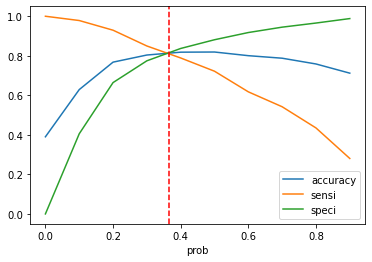

In [132]:
# Plotting the accuracy, Sensitivity, Specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.365, color='r', linestyle='--')
plt.show()

##### The cutoff value from the above graph looks like 0.365

In [133]:
# Looking the y_train_pred_final head

y_train_pred_final.head()

Actual Converted  Predicted Probabilities  Prospect ID  0.0  0.1  0.2  0.3  \
0                 0                 0.055885         6161    1    0    0    0   
1                 0                 0.171304         1435    1    1    0    0   
2                 1                 0.976236         9211    1    1    1    1   
3                 0                 0.088118         5378    1    0    0    0   
4                 0                 0.591482         4189    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    1    1    1    1    1    1  
3    0    0    0    0    0    0  
4    1    1    0    0    0    0

In [134]:
# based on cut off value lets predict the ytrain values

y_train_pred_final['Predicted Values'] = y_train_pred_final['Predicted Probabilities'].map(lambda x: 1 if x > 0.365 else 0)

In [135]:
# looking at the ytrain predicted values
y_train_pred_final. head()

Actual Converted  Predicted Probabilities  Prospect ID  0.0  0.1  0.2  0.3  \
0                 0                 0.055885         6161    1    0    0    0   
1                 0                 0.171304         1435    1    1    0    0   
2                 1                 0.976236         9211    1    1    1    1   
3                 0                 0.088118         5378    1    0    0    0   
4                 0                 0.591482         4189    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  Predicted Values  
0    0    0    0    0    0    0                 0  
1    0    0    0    0    0    0                 0  
2    1    1    1    1    1    1                 1  
3    0    0    0    0    0    0                 0  
4    1    1    0    0    0    0                 1

In [136]:
# dropping the individual cutoff columns
y_train_pred_final = y_train_pred_final.drop(columns=[0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis =1)

In [137]:
y_train_pred_final.head()

Actual Converted  Predicted Probabilities  Prospect ID  Predicted Values
0                 0                 0.055885         6161                 0
1                 0                 0.171304         1435                 0
2                 1                 0.976236         9211                 1
3                 0                 0.088118         5378                 0
4                 0                 0.591482         4189                 1

In [138]:
# assigning the lead score based on probability prediction
y_train_pred_final['Lead Score'] = y_train_pred_final['Predicted Probabilities'].map(lambda x : round(x *100))
y_train_pred_final.head()

Actual Converted  Predicted Probabilities  Prospect ID  Predicted Values  \
0                 0                 0.055885         6161                 0   
1                 0                 0.171304         1435                 0   
2                 1                 0.976236         9211                 1   
3                 0                 0.088118         5378                 0   
4                 0                 0.591482         4189                 1   

   Lead Score  
0           6  
1          17  
2          98  
3           9  
4          59

### Model Evaluation

In [139]:
# creating the confusion metrics based on actual y train data and predicted data
confusion_metrics = metrics.confusion_matrix(y_train_pred_final['Actual Converted'], y_train_pred_final['Predicted Values'])
print(confusion_metrics)

[[3190  705]
 [ 475 2017]]


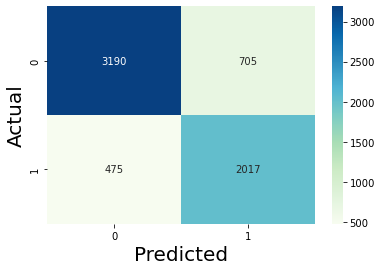

In [140]:
# Plotting confusion matrix:-
sns.heatmap(confusion_metrics, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()


##### Accuracy

In [141]:
# Check the overall accuracy:-

Accuracy = metrics.accuracy_score(y_train_pred_final['Actual Converted'], y_train_pred_final['Predicted Values'])
Accuracy

0.8152497260059496

In [142]:
TP = confusion_metrics[1,1] # true positive 
TN = confusion_metrics[0,0] # true negatives
FP = confusion_metrics[0,1] # false positives
FN = confusion_metrics[1,0] # false negatives

##### Sensitivity

In [143]:
# Checking the sensitivity of our logistic regression model:-

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8093900481540931

##### Specificity

In [144]:
# Calculating specificity:-

Specificity = TN / float(TN+FP)
Specificity

0.8189987163029525

In [145]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.1810012836970475


In [146]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7409992652461426


In [147]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8703956343792633


##### Precision and Recall

In [148]:
# Precision = TP / TP+FP
Precision = TP / float(TP+FP)
Precision

0.7409992652461426

In [149]:
# Recall = TP / TP + FN
Recall = TP / float(TP+FN)
Recall

0.8093900481540931

In [150]:
# printing all the metrics
print('Accuracy : {}%'.format(round(Accuracy*100)))
print('Sensitivity : {}%'.format(round(Sensitivity*100)))
print('Specificity : {}%'.format(round(Specificity*100)))
print('Precision : {}%'.format(round(Precision*100)))
print('Recall : {}%'.format(round(Recall*100)))

Accuracy : 82%
Sensitivity : 81%
Specificity : 82%
Precision : 74%
Recall : 81%


#### Plot ROC curve

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Actual Converted'], y_train_pred_final['Predicted Probabilities'], drop_intermediate = False )

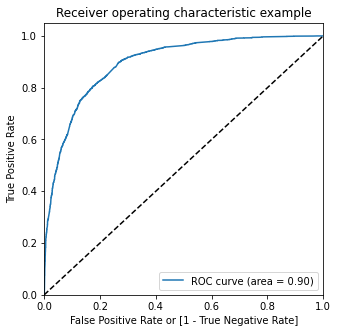

In [153]:
draw_roc(y_train_pred_final['Actual Converted'], y_train_pred_final['Predicted Probabilities'])

##### Observation
1. We got ROC value of 0.90, which is a good value

In [154]:
# Ploting the Precision-Recall Curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Actual Converted'], y_train_pred_final['Predicted Probabilities'])

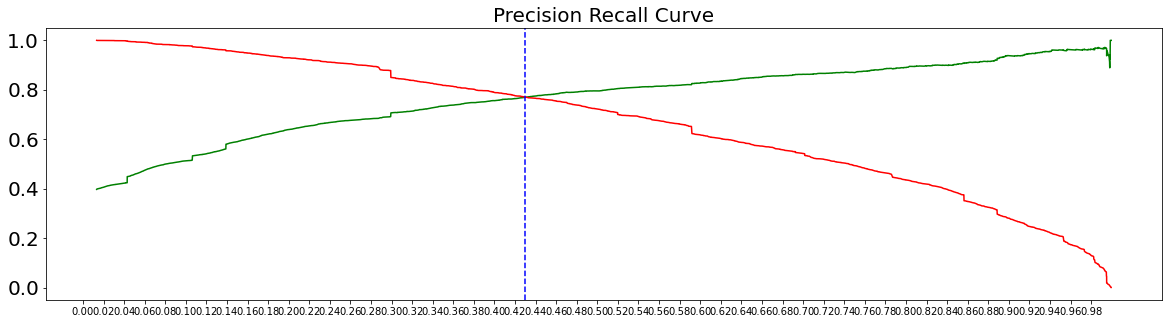

In [155]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.430, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

 ##### Observation
 1. From above above 'precision_recall_curve' we can see that cutoff point is 0.430

###  'Precision Recall Tradeoff Curve' for Data Evaluation

In [156]:
# plotting the Train dataset again with 0.430 as cutoff:-

y_train_pred_final['final_predicted_new'] = y_train_pred_final['Predicted Probabilities'].map( lambda x: 1 if x > 0.430 else 0)
y_train_pred_final.head()

Actual Converted  Predicted Probabilities  Prospect ID  Predicted Values  \
0                 0                 0.055885         6161                 0   
1                 0                 0.171304         1435                 0   
2                 1                 0.976236         9211                 1   
3                 0                 0.088118         5378                 0   
4                 0                 0.591482         4189                 1   

   Lead Score  final_predicted_new  
0           6                    0  
1          17                    0  
2          98                    1  
3           9                    0  
4          59                    1

In [157]:
# Confusion matrix:-

confusion_metrics_2 = metrics.confusion_matrix(y_train_pred_final['Actual Converted'], y_train_pred_final['final_predicted_new'])
print(confusion_metrics_2)

[[3320  575]
 [ 573 1919]]


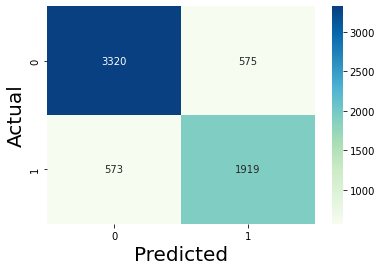

In [158]:
# Plotting confusion matrix:-
sns.heatmap(confusion_metrics_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

##### Accuracy

In [159]:
# Check the overall accuracy:-

Accuracy_new = metrics.accuracy_score(y_train_pred_final['Actual Converted'], y_train_pred_final['final_predicted_new'])
Accuracy_new

0.8202599029278221

In [160]:
TP = confusion_metrics_2[1,1] # true positive 
TN = confusion_metrics_2[0,0] # true negatives
FP = confusion_metrics_2[0,1] # false positives
FN = confusion_metrics_2[1,0] # false negatives

##### Sensitivity

In [161]:
# Checking the sensitivity of our logistic regression model:-

Sensitivity_new = TP / float(TP+FN)
Sensitivity_new

0.7700642054574639

##### Specificity

In [162]:
# Calculating specificity:-

Specificity_new = TN / float(TN+FP)
Specificity_new

0.8523748395378691

In [163]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.14762516046213095


In [164]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7694466720128308


In [165]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8528127408168508


##### Precision and Recall

In [166]:
# Precision = TP / TP+FP
Precision_new = TP / float(TP+FP)
Precision_new

0.7694466720128308

In [167]:
# Recall = TP / TP + FN
Recall_new = TP / float(TP+FN)
Recall_new

0.7700642054574639

In [168]:
# printing all the metrics
print('Accuracy : {}%'.format(round(Accuracy_new*100)))
print('Sensitivity : {}%'.format(round(Sensitivity_new*100)))
print('Specificity : {}%'.format(round(Specificity_new*100)))
print('Precision : {}%'.format(round(Precision_new*100)))
print('Recall : {}%'.format(round(Recall_new*100)))

Accuracy : 82%
Sensitivity : 77%
Specificity : 85%
Precision : 77%
Recall : 77%


##### Observation
1. True Positive number has decrease and True Negative number has increase using trade off curve cut off point. 
2. Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive so 'Recall'/'sensitivity' decreased for this point. We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.365 as optimal cutoff point.

## Performing Prediction on Test Dataset

In [169]:
# checking the X_test variables already scaled
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4539             0         0.00                     0.000000   
3836             0         0.20                     0.450067   
2538             0         0.25                     0.870395   
2952             0         0.25                     0.289836   
3202             0         0.10                     0.049711   

      Page Views Per Visit  A free copy of Mastering The Interview  \
4539              0.000000                                       0   
3836              0.222222                                       0   
2538              0.555556                                       1   
2952              0.277778                                       0   
3202              0.222222                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4539                                    0                          0   
3836                                    0                          0   
2538                                    1                          0   
2952                                    1                          0   
3202                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
4539                        0                           0                   0   
3836                        0                           0                   1   
2538                        0                           0                   0   
2952                        0                           0                   1   
3202                        0                           0                   1   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4539                       1                           0                   0   
3836                       0                           0                   0   
2538                       0                           0                   0   
2952                       0                           0                   0   
3202                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4539                      0                           0   
3836                      0                           0   
2538                      0                           0   
2952                      0                           0   
3202                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4539                             0                            0   
3836                             0                            0   
2538                             0                            0   
2952                             0                            0   
3202                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4539                                 0                           0   
3836                                 0                           0   
2538                                 0                           0   
2952                                 0                           0   
3202                                 0                           0   

      Last Activity_Form Submitted on Website  \
4539                                        0   
3836                                        0   
2538                                        0   
2952                                        0   
3202                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4539                                      0                     0   
3836                                      0                     0   
2538                                      0                     0   
2952                                      0      

In [170]:
# checking the y_test
y_test.head()

4539    1
3836    1
2538    0
2952    1
3202    0
Name: Converted, dtype: int64

In [171]:
# dropping all the unnecessary variables from the test dataset
final_variables = X_train_rfe.columns

X_test = X_test[final_variables]

In [172]:
# Predicting the y_test_pred using the final model

# For using the statsmodel library we have to add a constant 
X_test_sm = sm.add_constant(X_test)

# predicting the X_test now using the model 6
y_test_pred = logmodel6.predict(X_test_sm)

In [173]:
# creating the Dataframe to store the y_actuals, y_predicted

y_test_pred_final = pd.DataFrame({'Test Pred Probs' : y_test_pred})

# creating y_test into a dataframe
df_y_test = pd.DataFrame(y_test)


In [174]:
# Adding the y-actual and prospect ID to the dataFrame
y_test_pred_final['Test Actual Conversion'] = df_y_test['Converted']
y_test_pred_final['Prospect ID'] = df_y_test.index
y_test_pred_final.head()

Test Pred Probs  Test Actual Conversion  Prospect ID
4539         0.591482                       1         4539
3836         0.911386                       1         3836
2538         0.864885                       0         2538
2952         0.641554                       1         2952
3202         0.017128                       0         3202

In [175]:
# calculating the lead score for the dataset

y_test_pred_final['Lead Score'] = y_test_pred_final['Test Pred Probs'].map(lambda x: round(x*100))
y_test_pred_final.head()

Test Pred Probs  Test Actual Conversion  Prospect ID  Lead Score
4539         0.591482                       1         4539          59
3836         0.911386                       1         3836          91
2538         0.864885                       0         2538          86
2952         0.641554                       1         2952          64
3202         0.017128                       0         3202           2

In [176]:
# using the cut-off value of 0.365 to predict the conversion for y_test dataset

y_test_pred_final['Predicted Conversion'] = y_test_pred_final['Test Pred Probs'].map(lambda x: 1 if x > 0.365 else 0)
y_test_pred_final.head()

Test Pred Probs  Test Actual Conversion  Prospect ID  Lead Score  \
4539         0.591482                       1         4539          59   
3836         0.911386                       1         3836          91   
2538         0.864885                       0         2538          86   
2952         0.641554                       1         2952          64   
3202         0.017128                       0         3202           2   

      Predicted Conversion  
4539                     1  
3836                     1  
2538                     1  
2952                     1  
3202                     0

### Model Evaluation on Test dataset

#### Making the confusion Matrixs

In [177]:
#Confusion Matrix

confusion_test = metrics.confusion_matrix(y_test_pred_final['Test Actual Conversion'], y_test_pred_final['Predicted Conversion'])
confusion_test

array([[1365,  355],
       [ 207,  811]], dtype=int64)

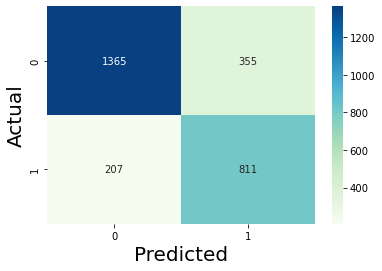

In [178]:
# Plotting confusion matrix:-
sns.heatmap(confusion_test, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [179]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

##### Accuracy

In [180]:
# Check the overall accuracy:-

Accuracy_new = metrics.accuracy_score(y_test_pred_final['Test Actual Conversion'], y_test_pred_final['Predicted Conversion'])
Accuracy_new

0.7947406866325786

##### Sensitivity

In [181]:
# Checking the sensitivity of our logistic regression model:-

Sensitivity_new = TP / float(TP+FN)
Sensitivity_new

0.7966601178781926

##### Specificity

In [182]:
# Calculating specificity:-

Specificity_new = TN / float(TN+FP)
Specificity_new

0.7936046511627907

In [183]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.2063953488372093


In [184]:
# positive predictive value :-

print (TP / float(TP+FP))

0.6955403087478559


In [185]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8683206106870229


##### Precision and Recall

In [186]:
# Precision = TP / TP+FP
Precision_new = TP / float(TP+FP)
Precision_new

0.6955403087478559

In [187]:
# Recall = TP / TP + FN
Recall_new = TP / float(TP+FN)
Recall_new

0.7966601178781926

In [188]:
# printing all the metrics
print('Accuracy : {}%'.format(round(Accuracy_new*100)))
print('Sensitivity : {}%'.format(round(Sensitivity_new*100)))
print('Specificity : {}%'.format(round(Specificity_new*100)))
print('Precision : {}%'.format(round(Precision_new*100)))
print('Recall : {}%'.format(round(Recall_new*100)))

Accuracy : 79%
Sensitivity : 80%
Specificity : 79%
Precision : 70%
Recall : 80%


##### Observation
1. The sensitivity value for test data is 80% while for train data is also 81% . The accuracy values is 79%. Which shows that model is performing well for test data set also.

### Final Model Equation

In [189]:
logmodel6.params

const                                                  -2.175775
Do Not Email                                           -1.199395
TotalVisits                                             1.159936
Total Time Spent on Website                             4.396581
Lead Origin_Landing Page Submission                    -1.000800
Lead Origin_Lead Add Form                               2.987703
Lead Source_Olark Chat                                  1.281876
Lead Source_Welingak Website                            3.170651
Last Activity_Email Opened                              0.972868
Last Activity_Others                                    1.788474
Last Activity_SMS Sent                                  2.194420
Last Activity_Unreachable                               1.060620
Last Activity_Unsubscribed                              1.801875
Specialization_Others                                  -0.930426
What is your current occupation_Working Professional    2.295716
What matters most to you 

Converted = -2.175775 - (1.199395 * Do Not Email) + (1.159936 * TotalVisits) + (4.396581 * Total Time Spent on Website) 
            - (1.000800 * Lead Origin_Landing Page Submission ) + (2.987703 * Lead Origin_Lead Add Form)
            + (1.281876 * Lead Source_Olark Chat) + (3.170651 * Lead Source_Welingak Website)
            + (0.972868 * Last Activity_Email Opened) + (1.788474 * Last Activity_Others )
            + (2.194420 * Last Activity_SMS Sent)+ (1.060620 * Last Activity_Unreachable)
            + (1.801875 * Last Activity_Unsubscribed) - (0.930426 * Specialization_Others) 
            + (2.295716 * What is your current occupation_Working Professional)
            - (1.278123 * What matters most to you in choosing a course_Other)

### Final Observation

Evaluation Metrics for the train Dataset:-
- Accuracy : 82%
- Sensitivity: 81%
- Specificity: 82%
- Precision: 74%
- Recall: 81%

Evaluation Metrics for the test Dataset:-
- Accuracy : 79%
- Sensitivity: 80%
- Specificity: 79%
- Precision: 70%
- Recall: 80%

## Recommendation

X-Education will have to mainly focus below important features responsible for good conversion rate are :-

- Total Time Spent on website: If Leads are spending more time on website, they be easy to convert into a hot lead.

- What is your current occupation_Working Professional : Those who are 'Working Professional' have higher lead conversion rate ,company should focus on working professionals and should focus on getting more number of leads.

- Lead Source_Welingak Website : Those leads who got to know about course from 'Welingak Website' have higher conversion rate, so company can focus on this website to get more number of potential leads.

- Lead Origin_Lead Add Form: Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause  have a higher chances of getting converted.

- Last Activity_SMS Sent: Lead whose last activity is sms sent can be potential lead for company.